### **IFI 8420 MACHINE LEARNING FOR BUSINESS : REGRESSION PROJECT : GROUP 3**

*   Shreyashi Mukhopadhyay









### **ML REGRESSION TECHNIQUES FOR ALLOCATION OF UN FINANCIAL AID BASED ON WHO HEALTH DATA**

### **Life Expectancy Dataset (WHO) :**

(https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/code?datasetId=12603&sortBy=voteCount

## 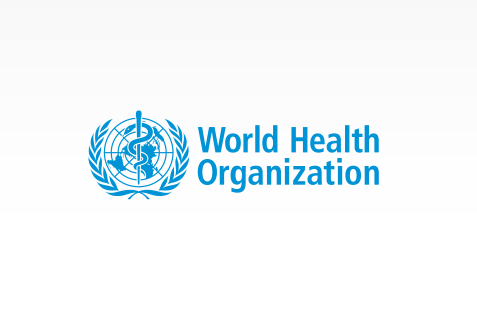

In [1]:
# IMPORT GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/IFI 8420 Regression Project/Regression_Project_Group3')

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [6]:
# Read the data

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

## Shape of the data

In [7]:
# Print shape of the data with print statements

print('The shape of the data is: ' , df.shape )
print("----------------------------------")
print(f'The data has: {df.shape[0]} rows \n')
print(f'The data has: {df.shape[1]} columns')


The shape of the data is:  (2938, 22)
----------------------------------
The data has: 2938 rows 

The data has: 22 columns


## Data description

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.describe(include=['int64','float64']).drop(columns="Year").T

count          mean           std       min  \
Life expectancy                  2928.0  6.922493e+01  9.523867e+00  36.30000   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   1.00000   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   0.00000   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   0.01000   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   0.00000   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   1.00000   
Measles                          2938.0  2.419592e+03  1.146727e+04   0.00000   
 BMI                             2904.0  3.832125e+01  2.004403e+01   1.00000   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   0.00000   
Polio                            2919.0  8.255019e+01  2.342805e+01   3.00000   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   0.37000   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   2.00000   
 HIV/AIDS                        2938.0  1.742103e+00  5.077785e+00   0.10000   
GDP                              2490.0  7.483158e+03  1.427017e+04   1.68135   
Population                       2286.0  1.275338e+07  6.101210e+07  34.00000   
 thinness  1-19 years            2904.0  4.839704e+00  4.420195e+00   0.10000   
 thinness 5-9 years              2904.0  4.870317e+00  4.508882e+00   0.10000   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   0.00000   
Schooling                        2775.0  1.199279e+01  3.358920e+00   0.00000   

                                           25%           50%           75%  \
Life expectancy                      63.100000  7.210000e+01  7.570000e+01   
Adult Mortality                      74.000000  1.440000e+02  2.280000e+02   
infant deaths                         0.000000  3.000000e+00  2.200000e+01   
Alcohol                               0.877500  3.755000e+00  7.702500e+00   
percentage expenditure                4.685343  6.491291e+01  4.415341e+02   
Hepatitis B                          77.000000  9.200000e+01  9.700000e+01   
Measles                               0.000000  1.700000e+01  3.602500e+02   
 BMI                                 19.300000  4.350000e+01  5.620000e+01   
under-five deaths                     0.000000  4.000000e+00  2.800000e+01   
Polio                                78.000000  9.300000e+01  9.700000e+01   
Total expenditure                     4.260000  5.755000e+00  7.492500e+00   
Diphtheria                           78.000000  9.300000e+01  9.700000e+01   
 HIV/AIDS                             0.100000  1.000000e-01  8.000000e-01   
GDP                                 463.935626  1.766948e+03  5.910806e+03   
Population                       195793.250000  1.386542e+06  7.420359e+06   
 thinness  1-19 years                 1.600000  3.300000e+00  7.200000e+00   
 thinness 5-9 years                   1.500000  3.300000e+00  7.200000e+00   
Income composition of resources       0.493000  6.770000e-01  7.790000e-01   
Schooling                            10.100000  1.230000e+01  1.430000e+01   

                                          max  
Life expectancy                  8.900000e+01  
Adult Mortality                  7.230000e+02  
infant deaths                    1.800000e+03  
Alcohol                          1.787000e+01  
percentage expenditure           1.947991e+04  
Hepatitis B                      9.900000e+01  
Measles                          2.121830e+05  
 BMI                             8.730000e+01  
under-five deaths                2.500000e+03  
Polio                            9.900000e+01  
Total expenditure                1.760000e+01  
Diphtheria                       9.900000e+01  
 HIV/AIDS                        5.060000e+01  
GDP                              1.191727e+05  
Population                       1.293859e+09  
 thinness  1-19 years            2.770000e+01  
 thinness 5-9 years              2.8

In [10]:
df.describe(include=['object'])

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [11]:
duplicate_count = df.duplicated().sum()

print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


In [12]:
df1 =df.copy()
df1.head(3)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  

[3 rows x 22 columns]

In [13]:
df1.rename(columns = {            " BMI " :"BMI",
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_10-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [14]:
for col in enumerate(df1.columns):
  print(col)

(0, 'Country')
(1, 'Year')
(2, 'Status')
(3, 'Life_expectancy')
(4, 'Adult_mortality')
(5, 'Infant_deaths')
(6, 'Alcohol')
(7, 'Percentage_expenditure')
(8, 'HepatitisB')
(9, 'Measles')
(10, 'BMI')
(11, 'Under_five_deaths')
(12, 'Polio')
(13, 'Total_expenditure')
(14, 'Diphtheria')
(15, 'HIV/AIDS')
(16, 'GDP')
(17, 'Population')
(18, 'Thinness_10-19_years')
(19, 'Thinness_5-9_years')
(20, 'Income_composition_of_resources')
(21, 'Schooling')


## Check for Null values

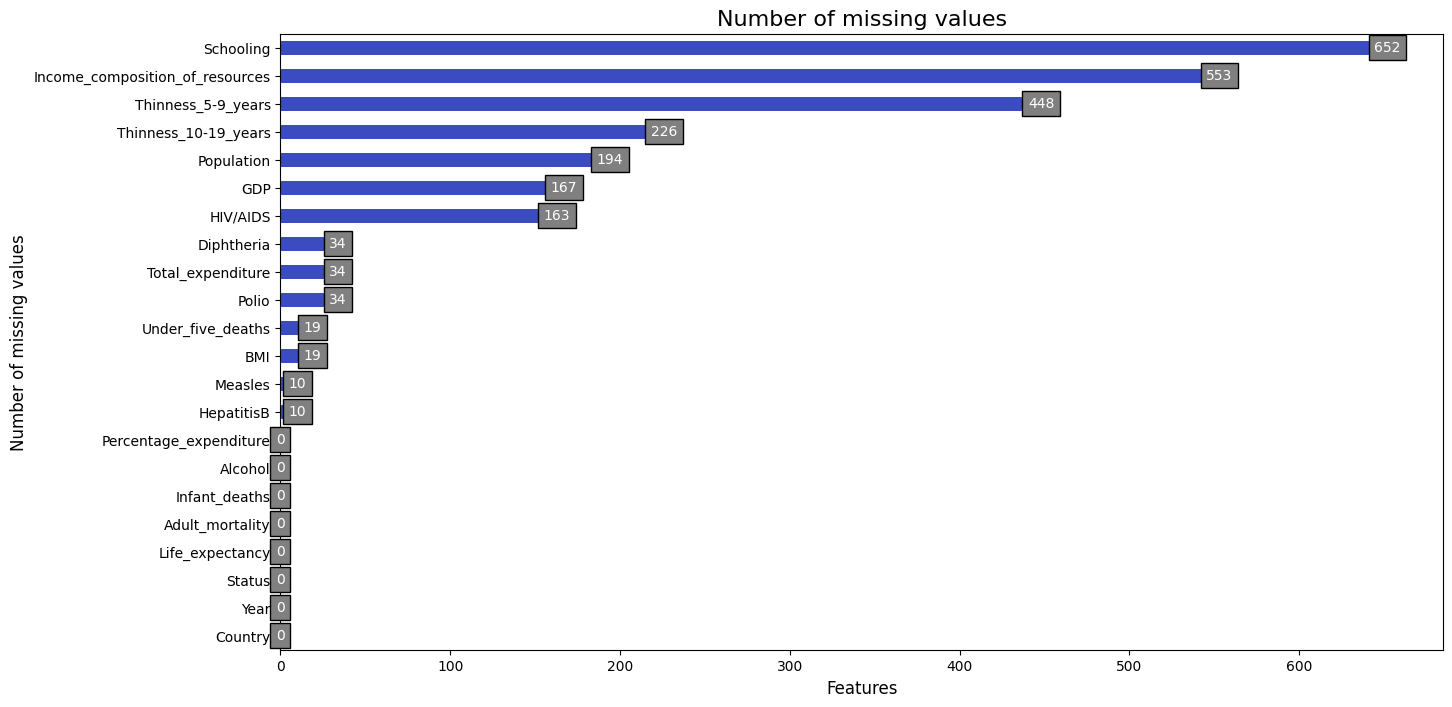

In [15]:
import numpy as np

# Plot the Null values
df1.isnull().sum().sort_values(ascending=True).plot(kind='barh', cmap = 'coolwarm', figsize= (15, 8))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of missing values', fontsize=12)
plt.title('Number of missing values', fontsize=16)

# Increase the distance between the bars
plt.yticks(np.arange(df1.shape[1]), df1.columns, rotation=0)

# Remove background grid
plt.grid(False)


# Add text to each bar
for i, value in enumerate(df1.isnull().sum().sort_values(ascending=True)):

    ax = plt.gca()  # Get the current axes object

    # Calculate the bar width
    bar_width = value / df1.shape[0]

    # Create a text object with the value
    text = ax.text(value - bar_width / 2, i, str(value), ha='center', va='center', fontsize=10, color='white')

    # Place the text object within the bar and set the background color
    text.set_bbox(dict(facecolor='gray'))

plt.show()


## Impute the Null values with Median values

In [16]:
df2 = df1.copy()
df2.head(3)

Country  Year      Status  Life_expectancy  Adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant_deaths  Alcohol  Percentage_expenditure  HepatitisB  Measles  ...  \
0             62     0.01               71.279624        65.0     1154  ...   
1             64     0.01               73.523582        62.0      492  ...   
2             66     0.01               73.219243        64.0      430  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness_10-19_years  Thinness_5-9_years  Income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   

   Schooling  
0       10.1  
1       10.0  
2        9.9  

[3 rows x 22 columns]

In [17]:
# Impute all the missing values with median values of the data

numeric_features = df2.select_dtypes(include=['int64', 'float64']).drop(columns="Year").columns

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df2[numeric_features] = imputer.fit_transform(df2[numeric_features])

df2.head(3)

Country  Year      Status  Life_expectancy  Adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant_deaths  Alcohol  Percentage_expenditure  HepatitisB  Measles  ...  \
0           62.0     0.01               71.279624        65.0   1154.0  ...   
1           64.0     0.01               73.523582        62.0    492.0  ...   
2           66.0     0.01               73.219243        64.0    430.0  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness_10-19_years  Thinness_5-9_years  Income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   

   Schooling  
0       10.1  
1       10.0  
2        9.9  

[3 rows x 22 columns]

In [18]:
df2.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_10-19_years               0
Thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [19]:
# Create a dataframe of all numeric columns except the column year

df_numeric = df2.select_dtypes(include=['int64', 'float64']).drop('Year', axis=1)
df_numeric.head(3)

Life_expectancy  Adult_mortality  Infant_deaths  Alcohol  \
0             65.0            263.0           62.0     0.01   
1             59.9            271.0           64.0     0.01   
2             59.9            268.0           66.0     0.01   

   Percentage_expenditure  HepatitisB  Measles   BMI  Under_five_deaths  \
0               71.279624        65.0   1154.0  19.1               83.0   
1               73.523582        62.0    492.0  18.6               86.0   
2               73.219243        64.0    430.0  18.1               89.0   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness_10-19_years  Thinness_5-9_years  Income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   

   Schooling  
0       10.1  
1       10.0  
2        9.9

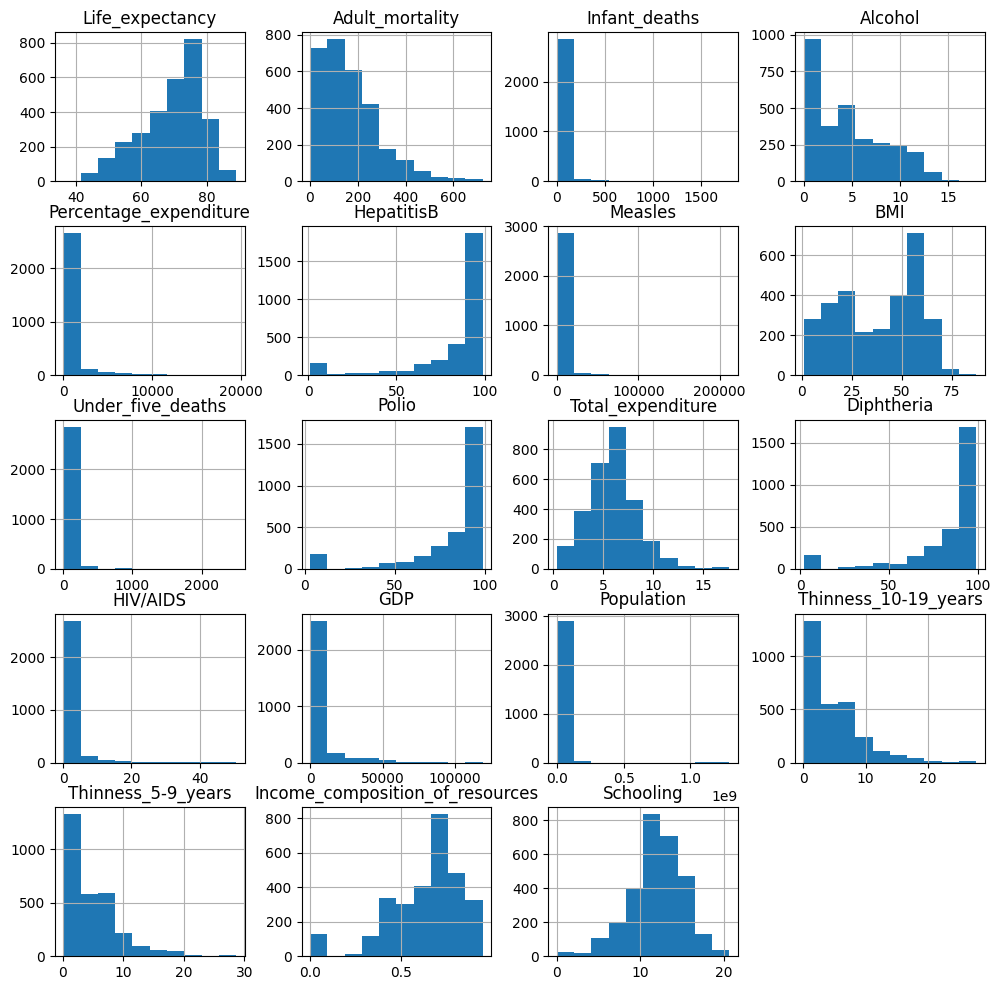

In [20]:
# Plot the histograms of the above dataframe

df_numeric.hist(figsize=(12, 12))
plt.show()

## KDE Distributions for All variables

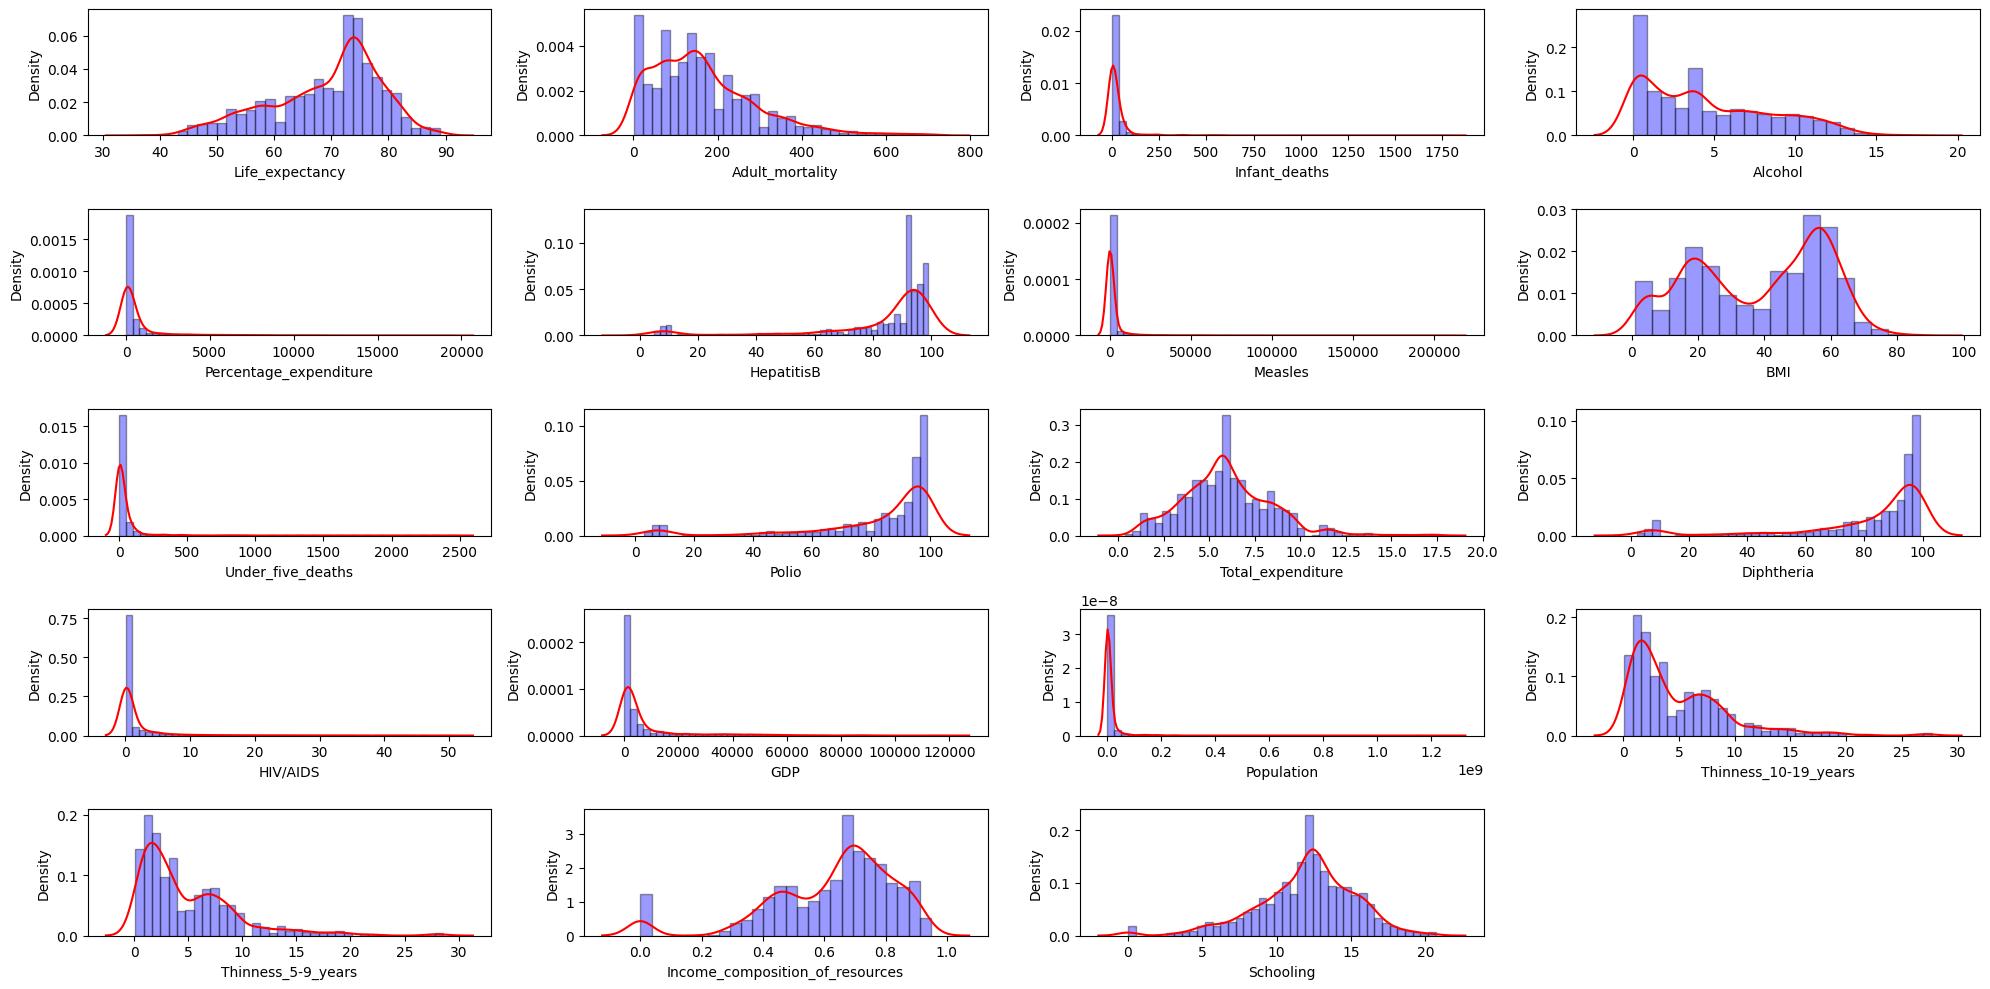

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

count = 1

fig = plt.figure(figsize = [20, 10])
cols = df_numeric.columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(df_numeric[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()

## Applying Log Transformation to rescale and reduce skewness

In [22]:
# Convert all the numeric columns to log scale

import numpy as np
df_numeric_log = np.log(df_numeric)
df_numeric_log.head()

Life_expectancy  Adult_mortality  Infant_deaths  Alcohol  \
0         4.174387         5.572154       4.127134 -4.60517   
1         4.092677         5.602119       4.158883 -4.60517   
2         4.092677         5.590987       4.189655 -4.60517   
3         4.085976         5.605802       4.234107 -4.60517   
4         4.080922         5.616771       4.262680 -4.60517   

   Percentage_expenditure  HepatitisB   Measles       BMI  Under_five_deaths  \
0                4.266611    4.174387  7.050989  2.949688           4.418841   
1                4.297606    4.127134  6.198479  2.923162           4.454347   
2                4.293458    4.158883  6.063785  2.895912           4.488636   
3                4.359068    4.204693  7.932721  2.867899           4.532599   
4                1.959687    4.219508  8.010692  2.844909           4.574711   

      Polio  Total_expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
0  1.791759           2.099244    4.174387 -2.302585  6.370345   17.334091   
1  4.060443           2.101692    4.127134 -2.302585  6.417870   12.699494   
2  4.127134           2.095561    4.158883 -2.302585  6.448486   17.272826   
3  4.204693           2.142416    4.204693 -2.302585  6.507217   15.123021   
4  4.219508           2.063058    4.219508 -2.302585  4.151626   14.906964   

   Thinness_10-19_years  Thinness_5-9_years  Income_composition_of_resources  \
0              2.844909            2.850707                        -0.736055   
1              2.862201            2.862201                        -0.742337   
2              2.873565            2.873565                        -0.755023   
3              2.884801            2.890372                        -0.770028   
4              2.901422            2.901422                        -0.789658   

   Schooling  
0   2.312535  
1   2.302585  
2   2.292535  
3   2.282382  
4   2.251292

In [23]:
df_numeric_log.shape

(2938, 19)

## Box plots of Log transformed data

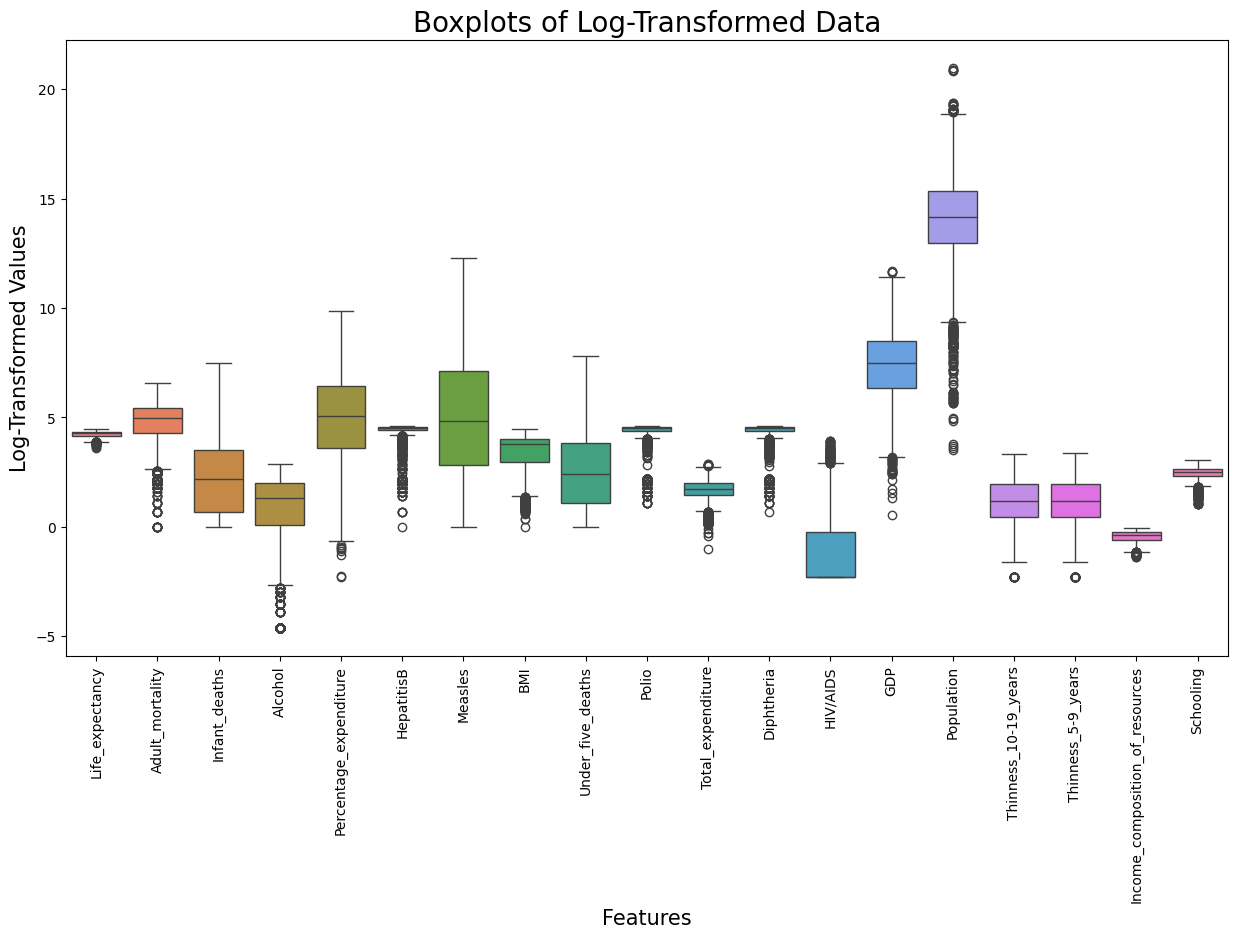

In [24]:
# Box plots for df1_numeric_log in a single plot using seaborn

import seaborn as sns

# Create a figure with a single subplot
plt.figure(figsize=(15, 8))

# Plot the boxplots for each column in df1_numeric_log
sns.boxplot(data=df_numeric_log, orient="v")

# Add a title and labels
plt.title("Boxplots of Log-Transformed Data", fontsize=20)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Log-Transformed Values", fontsize=15)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Box plots for Outlier Visualization

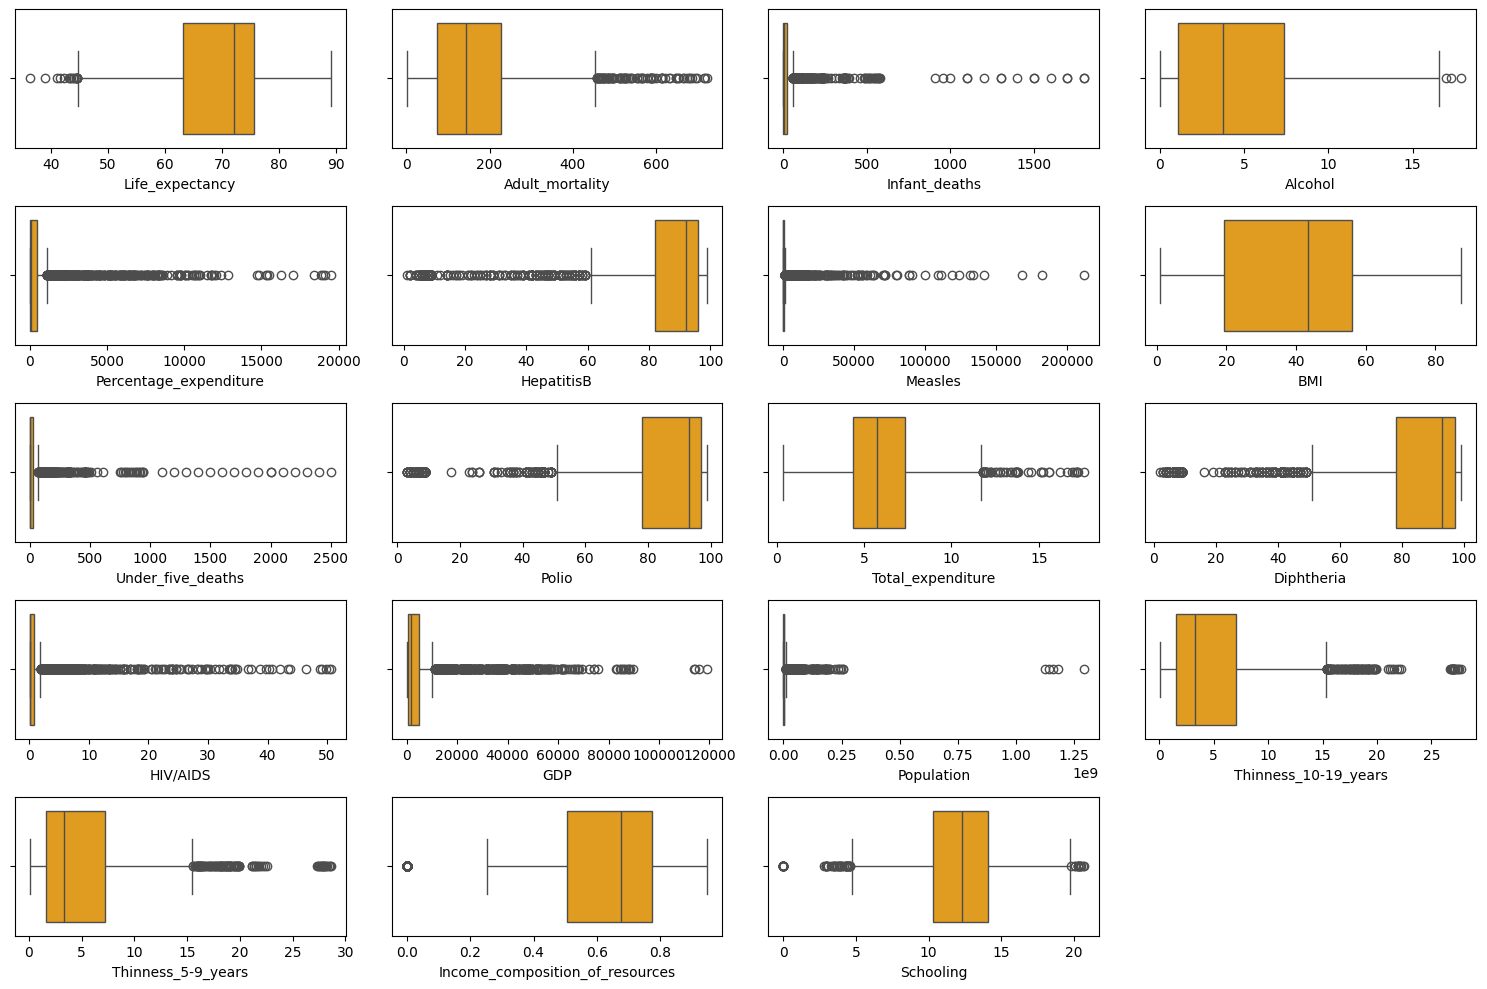

In [25]:
import matplotlib.pyplot as plt

count = 1

plt.figure(figsize = (15, 10))

cols = df_numeric.columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = df_numeric[col], color="orange")
    count += 1


plt.tight_layout()

plt.show()



## Windsorization method for outlier removal



In [26]:
# Install the feature_engine library
!pip install feature_engine


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.8 MB/s eta 0:00:00


In [27]:
import seaborn as sns
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

# Import the winsorize function
from feature_engine.outliers import Winsorizer

In [28]:
df3 = df2.copy()
df3.head(3)

Country  Year      Status  Life_expectancy  Adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   Infant_deaths  Alcohol  Percentage_expenditure  HepatitisB  Measles  ...  \
0           62.0     0.01               71.279624        65.0   1154.0  ...   
1           64.0     0.01               73.523582        62.0    492.0  ...   
2           66.0     0.01               73.219243        64.0    430.0  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

   Thinness_10-19_years  Thinness_5-9_years  Income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   

   Schooling  
0       10.1  
1       10.0  
2        9.9  

[3 rows x 22 columns]

In [29]:
# dropping mistakes in the data collection per the reasoning above
df3 = df3[(df3.Infant_deaths<1000) & (df3.Measles<1000) & (df3['Under_five_deaths']<1000)]

In [30]:
# Apply winsorization to the df2 dataframe

df3['winz_Life_expectancy'] = winsorize(df3['Life_expectancy'], (0.10,0.0))
df3['winz_Adult_mortality'] = winsorize(df3['Adult_mortality'], (0.0,0.10))
df3['winz_Alcohol'] = winsorize(df3['Alcohol'], (0.0,0.01))
df3['winz_HepatitisB'] = winsorize(df3['HepatitisB'], (0.15,0.0))
df3['winz_Polio'] = winsorize(df3['Polio'], (0.15,0.0))
df3['winz_Total_expenditure'] = winsorize(df3['Total_expenditure'], (0.0,0.10))
df3['winz_Diphtheria'] = winsorize(df3['Diphtheria'], (0.10,0.0))
df3['winz_HIV/AIDS'] = winsorize(df3['HIV/AIDS'], (0.0, 0.21))
df3['winz_Thinness_10-19_years'] = winsorize(df3['Thinness_10-19_years'], (0.0,0.10))
df3['winz_Thinness_5-9_years'] = winsorize(df3['Thinness_5-9_years'], (0.0,0.10))
df3['winz_Income_composition_of_resources'] = winsorize(df3['Income_composition_of_resources'], (0.10,0.0))
df3['winz_Schooling'] = winsorize(df3['Schooling'], (0.10,0.05))
df3['winz_Infant_deaths'] = winsorize(df3['Infant_deaths'], (0.0, 0.15))
df3['winz_Measles'] = winsorize(df3['Measles'], (0.0, 0.17))
df3['winz_Under_five_deaths'] = winsorize(df3['Under_five_deaths'], (0.0, 0.5))

In [31]:
# Log transformations

df3['winz_log_gdp'] = winsorize(np.log(df3['GDP']), (0.10, 0.0))
df3['winz_log_population'] = winsorize(np.log(df3['Population']), (0.10, 0.0))
df3['winz_log_Percentage_expenditure'] = winsorize(np.log(df3['Percentage_expenditure']))

In [32]:
df3 = df3.replace([np.inf, -np.inf], 0)

In [33]:
df3.isnull().sum()

Country                                 0
Year                                    0
Status                                  0
Life_expectancy                         0
Adult_mortality                         0
Infant_deaths                           0
Alcohol                                 0
Percentage_expenditure                  0
HepatitisB                              0
Measles                                 0
BMI                                     0
Under_five_deaths                       0
Polio                                   0
Total_expenditure                       0
Diphtheria                              0
HIV/AIDS                                0
GDP                                     0
Population                              0
Thinness_10-19_years                    0
Thinness_5-9_years                      0
Income_composition_of_resources         0
Schooling                               0
winz_Life_expectancy                    0
winz_Adult_mortality              

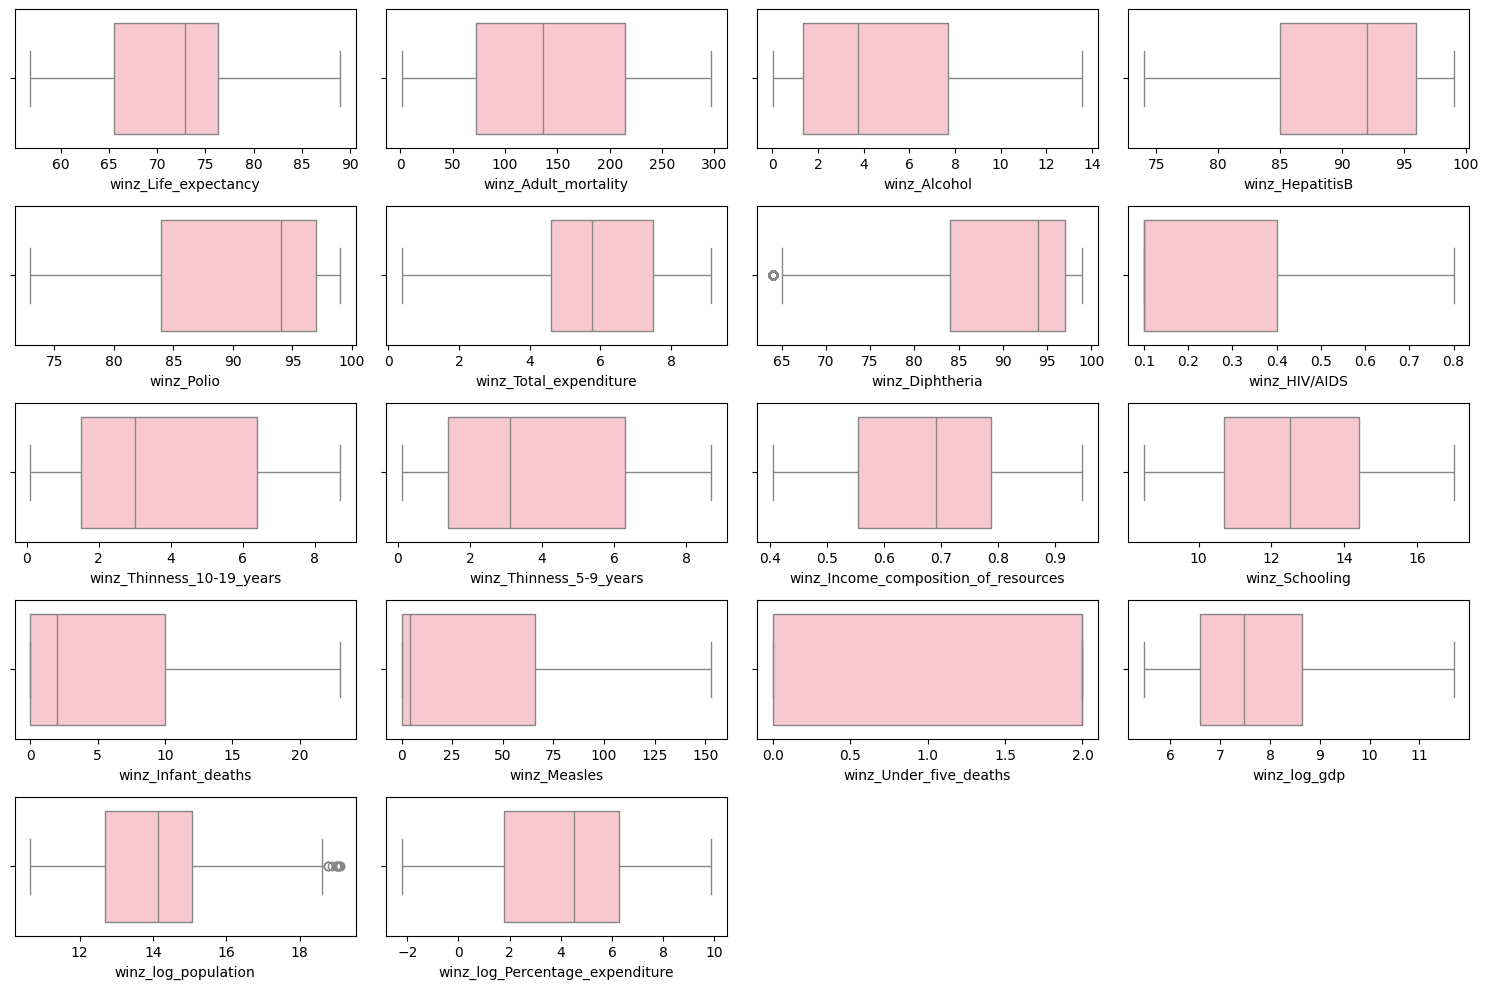

In [34]:
# Create box plots for all the winsorized columns in df3

count = 1

plt.figure(figsize = (15, 10))

cols = df3.columns.tolist()

for col in cols:
    if 'winz' in col:
        plt.subplot(5, 4, count)
        sns.boxplot(x = df3[col], color="pink")
        count += 1


plt.tight_layout()

plt.show()


In [35]:
# Create a dataframe using the country, year, status and winsorized columns

df4 = df3[["Country","Year","Status",
                 "winz_Life_expectancy",
                 "winz_Adult_mortality",
                 "winz_Alcohol",
                 "winz_HepatitisB",
                 "winz_Polio",
                 "winz_Total_expenditure",
                 "winz_Diphtheria",
                 "winz_HIV/AIDS",
                 "winz_Thinness_10-19_years",
                 "winz_Thinness_5-9_years",
                 "winz_Income_composition_of_resources",
                 "winz_Schooling",
                 "winz_log_gdp",
                 "winz_log_population",
                 "winz_log_Percentage_expenditure",
                 "winz_Infant_deaths",
                 "winz_Measles",
                 "winz_Under_five_deaths"]].copy()

print(df4.shape)

df4.head()

(2413, 21)


Country  Year      Status  winz_Life_expectancy  winz_Adult_mortality  \
1   Afghanistan  2014  Developing                  59.9                 271.0   
2   Afghanistan  2013  Developing                  59.9                 268.0   
11  Afghanistan  2004  Developing                  57.0                 293.0   
12  Afghanistan  2003  Developing                  56.8                 295.0   
16      Albania  2015  Developing                  77.8                  74.0   

    winz_Alcohol  winz_HepatitisB  winz_Polio  winz_Total_expenditure  \
1           0.01             74.0        73.0                    8.18   
2           0.01             74.0        73.0                    8.13   
11          0.02             74.0        73.0                    8.79   
12          0.01             74.0        73.0                    8.82   
16          4.60             99.0        99.0                    6.00   

    winz_Diphtheria  ...  winz_Thinness_10-19_years  winz_Thinness_5-9_years  \
1              64.0  ...                        8.7                      8.7   
2              64.0  ...                        8.7                      8.7   
11             64.0  ...                        8.7                      8.7   
12             64.0  ...                        8.7                      8.7   
16             99.0  ...                        1.2                      1.3   

    winz_Income_composition_of_resources  winz_Schooling  winz_log_gdp  \
1                                  0.476            10.0      6.417870   
2                                  0.470             9.9      6.448486   
11                                 0.405             8.5      5.467686   
12                                 0.405             8.5      5.467686   
16                                 0.762            14.2      8.282541   

    winz_log_population  winz_log_Percentage_expenditure  winz_Infant_deaths  \
1             12.699494                         4.297606                23.0   
2             17.272826                         4.293458                23.0   
11            16.998510                         2.727596                23.0   
12            14.676226                         2.405958                23.0   
16            10.654054                         5.899829                 0.0   

    winz_Measles  winz_Under_five_deaths  
1          153.0                     2.0  
2          153.0                     2.0  
11         153.0                     2.0  
12         153.0                     2.0  
16           0.0                     0.0  

[5 rows x 21 columns]

## Exploratory Data Analysis

In [36]:
# Print the count of unique countries in df1

print('The number of unique countries in the dataframe is:', df4['Country'].nunique())


The number of unique countries in the dataframe is: 190


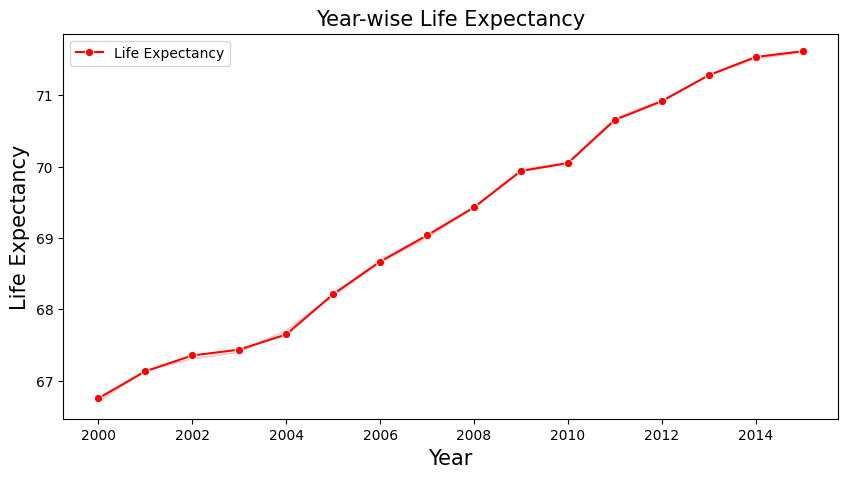

In [37]:
# Create a line plot using seaborn to visualize the year wise life expectancy

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x="Year", y="Life_expectancy", color="red", marker ="o", label="Life Expectancy", errorbar=('ci', False))
plt.title("Year-wise Life Expectancy", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Life Expectancy", fontsize=15)
plt.show()


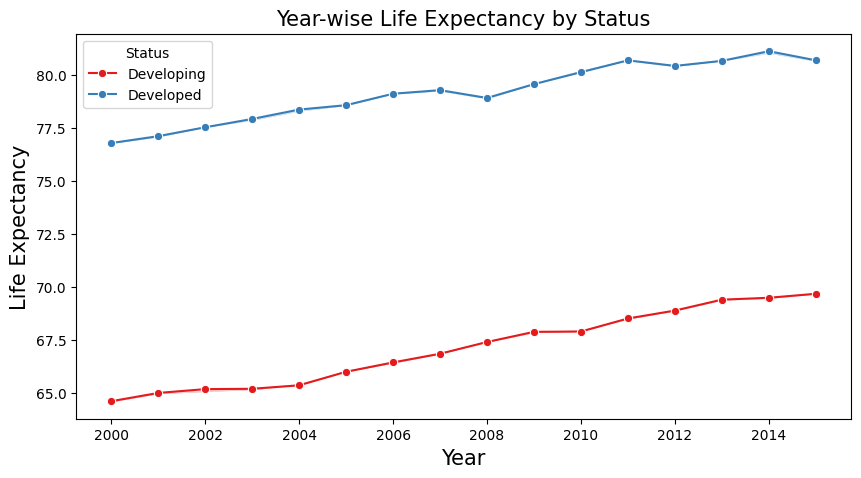

In [38]:
# Plot the life expectancy data over the years by status using a seaborn sns line chart

plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x="Year", y="Life_expectancy", hue="Status", marker ="o", errorbar=('ci', False),palette="Set1")
plt.title("Year-wise Life Expectancy by Status", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Life Expectancy", fontsize=15)
plt.show()


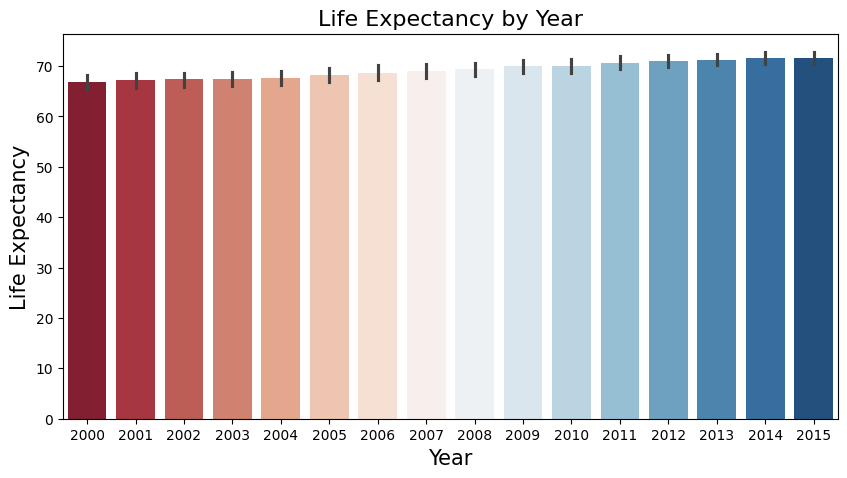

In [39]:
# Visualize the life expectancy by year using bar chart in seaborn and apply palette RdBu

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# Create a bar chart using Seaborn
sns.barplot(x="Year", y="Life_expectancy", data=df2, palette="RdBu")

# Add a title and labels
plt.title("Life Expectancy by Year", fontsize=16)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Life Expectancy", fontsize=15)

# Show the plot
plt.show()


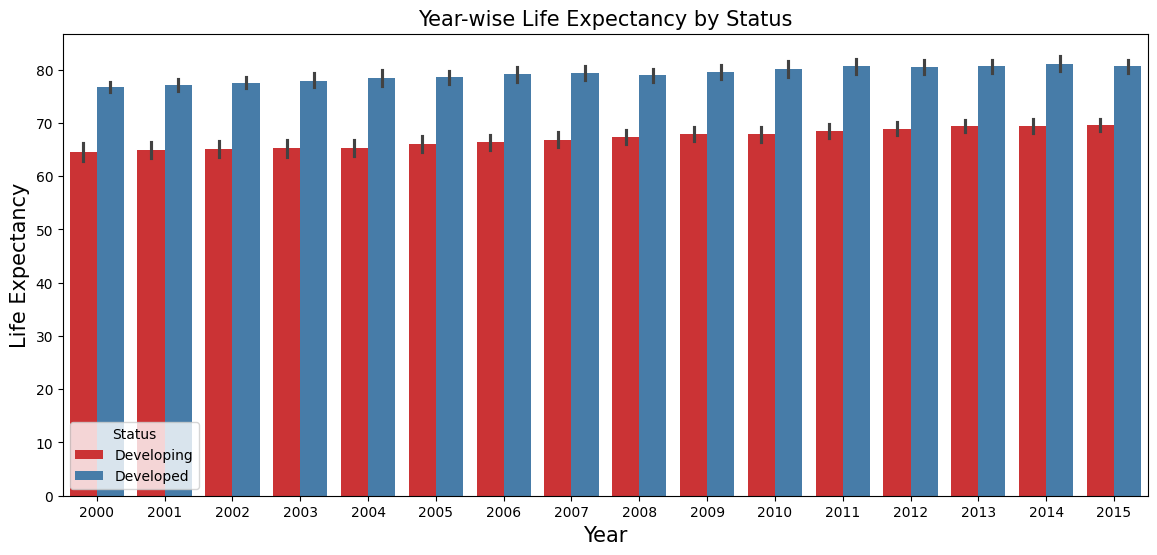

In [40]:
# Plot the life expectancy data over the years by status using a seaborn sns bar chart

plt.figure(figsize=(14, 6))
sns.barplot(data=df2, x="Year", y="Life_expectancy", hue="Status", palette="Set1", errorbar=('ci'))
# Add a title and labels
plt.title("Year-wise Life Expectancy by Status", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Life Expectancy", fontsize=15)
plt.show()


In [41]:
# Generate the mean schooling values for top 10 countries

df4.groupby('Country')['winz_Schooling'].mean().sort_values(ascending=False).head(10)


Country
Australia      17.000000
New Zealand    17.000000
Norway         17.000000
Iceland        16.987500
Finland        16.981250
Ireland        16.868750
Netherlands    16.771429
Denmark        16.725000
Germany        16.580000
Argentina      16.431250
Name: winz_Schooling, dtype: float64

In [42]:
# Generate the mean schooling values for the last 10 countries

df4.groupby('Country')['winz_Schooling'].mean().sort_values(ascending=False).tail(10)


Country
Burkina Faso                8.5
Pakistan                    8.5
Djibouti                    8.5
Central African Republic    8.5
Chad                        8.5
Mali                        8.5
Eritrea                     8.5
Ethiopia                    8.5
Tuvalu                      8.5
Marshall Islands            8.5
Name: winz_Schooling, dtype: float64

In [43]:
# Generate schooling mean for United states of America and Print it

print(df4.groupby('Country')['winz_Schooling'].mean().loc['United States of America'])


12.3


## Distribution of Life expectancy

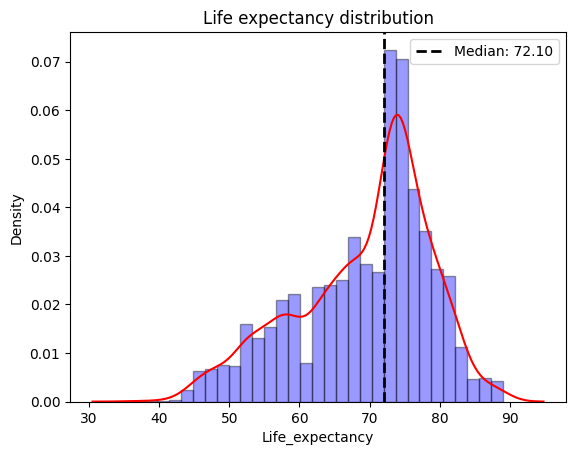

In [44]:
# Plot the distribution of life expectancy and label the median value

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of life expectancy
sns.distplot(df2['Life_expectancy'], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')

# Get the median value of life expectancy
median_life_expectancy = df2['Life_expectancy'].median()

# Add a vertical line at the median value with a label
plt.axvline(x=median_life_expectancy, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median_life_expectancy:.2f}')

# Add a title and show the plot
plt.title('Life expectancy distribution')
plt.legend()
plt.show()


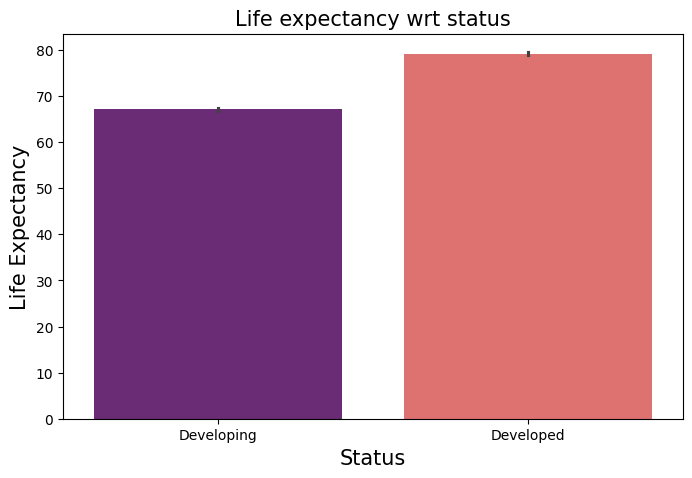

In [45]:
# Plot the life expectancy wrt status

plt.figure(figsize=(8, 5))
sns.barplot(data=df2, x="Status", y="Life_expectancy", palette="magma", errorbar=('ci'))
# Add a title and labels
plt.title("Life expectancy wrt status", fontsize=15)
plt.xlabel("Status", fontsize=15)
plt.ylabel("Life Expectancy", fontsize=15)
plt.show()


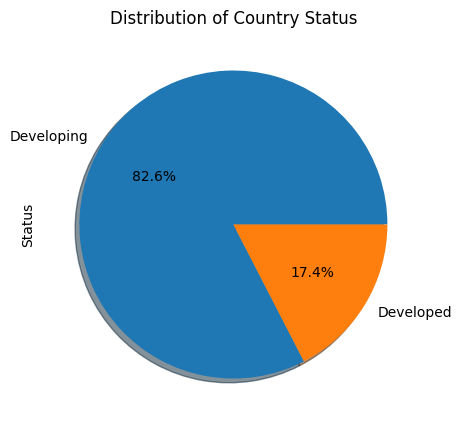

In [46]:
# Plot a pie chart to view the distribution of the status of the country

df2['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(5, 5))
plt.title('Distribution of Country Status')
plt.show()

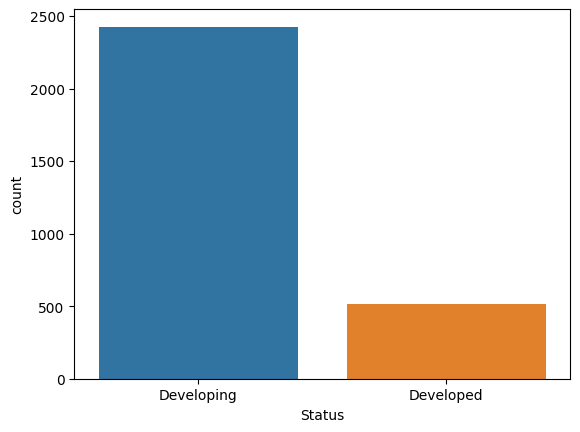

In [47]:
# Generate a seaborn count plot to generate the distribution of status

sns.countplot(data=df2, x='Status', hue="Status")
plt.show()

## Countries with Highest Life Expectancy

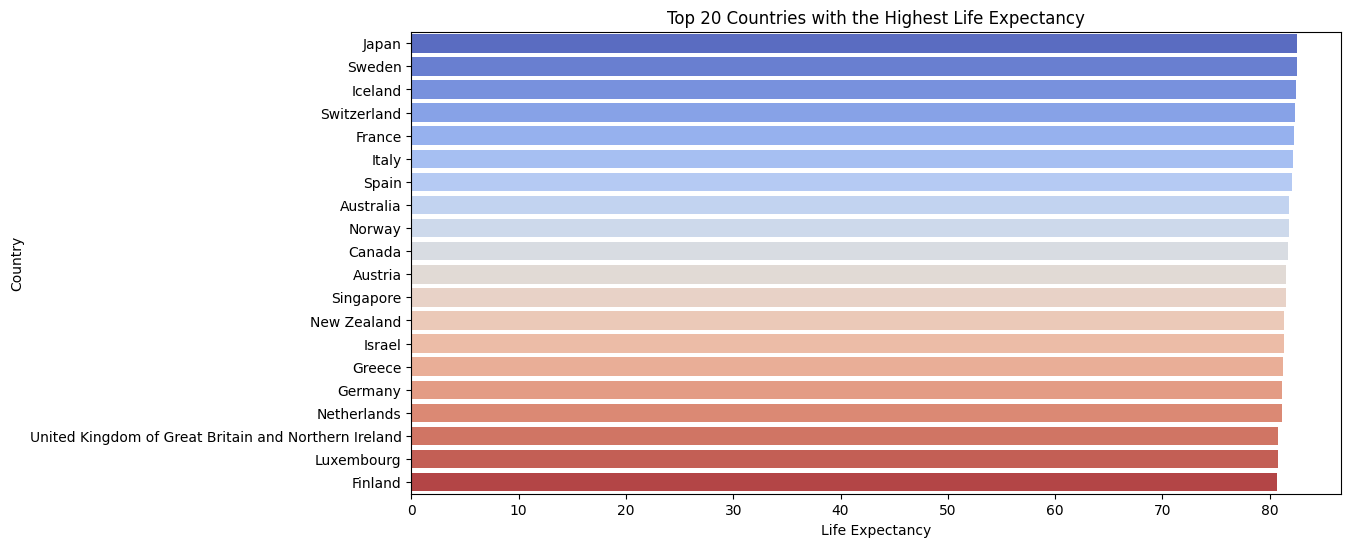

In [48]:
# Plot life expectancy group by country top 10

# Group the data by country and calculate the average life expectancy
grouped_data = df2.groupby('Country')["Life_expectancy"].mean().sort_values(ascending=False)

# Get the top 10 countries with the highest life expectancy
top_10_countries = grouped_data.head(20)

# Create a bar plot of the top 10 countries with the highest life expectancy
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette="coolwarm")
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.title('Top 20 Countries with the Highest Life Expectancy')
plt.show()


## Countries with Lowest Life expectancy

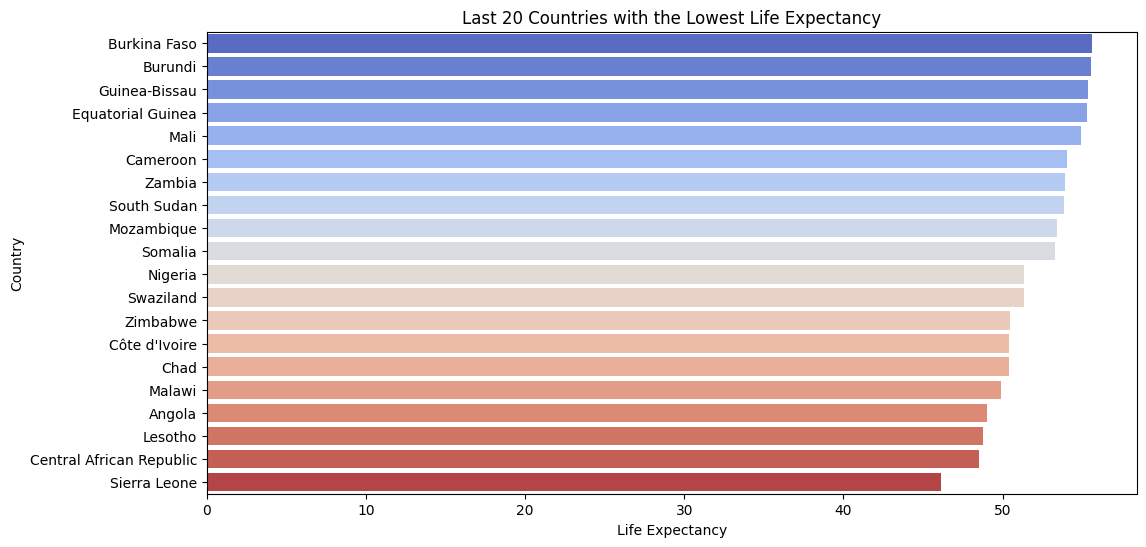

In [49]:
# plot life expectancy group by country last 20

# Group the data by country and calculate the average life expectancy
grouped_data = df2.groupby('Country')['Life_expectancy'].mean().dropna().sort_values(ascending=False)

# Get the last 20 countries with the lowest life expectancy
last_20_countries = grouped_data.tail(20)

# Create a bar plot of the last 20 countries with the lowest life expectancy
plt.figure(figsize=(12, 6))
sns.barplot(x=last_20_countries.values, y=last_20_countries.index, palette="coolwarm")
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.title('Last 20 Countries with the Lowest Life Expectancy')
plt.show()


## Scatter Plots

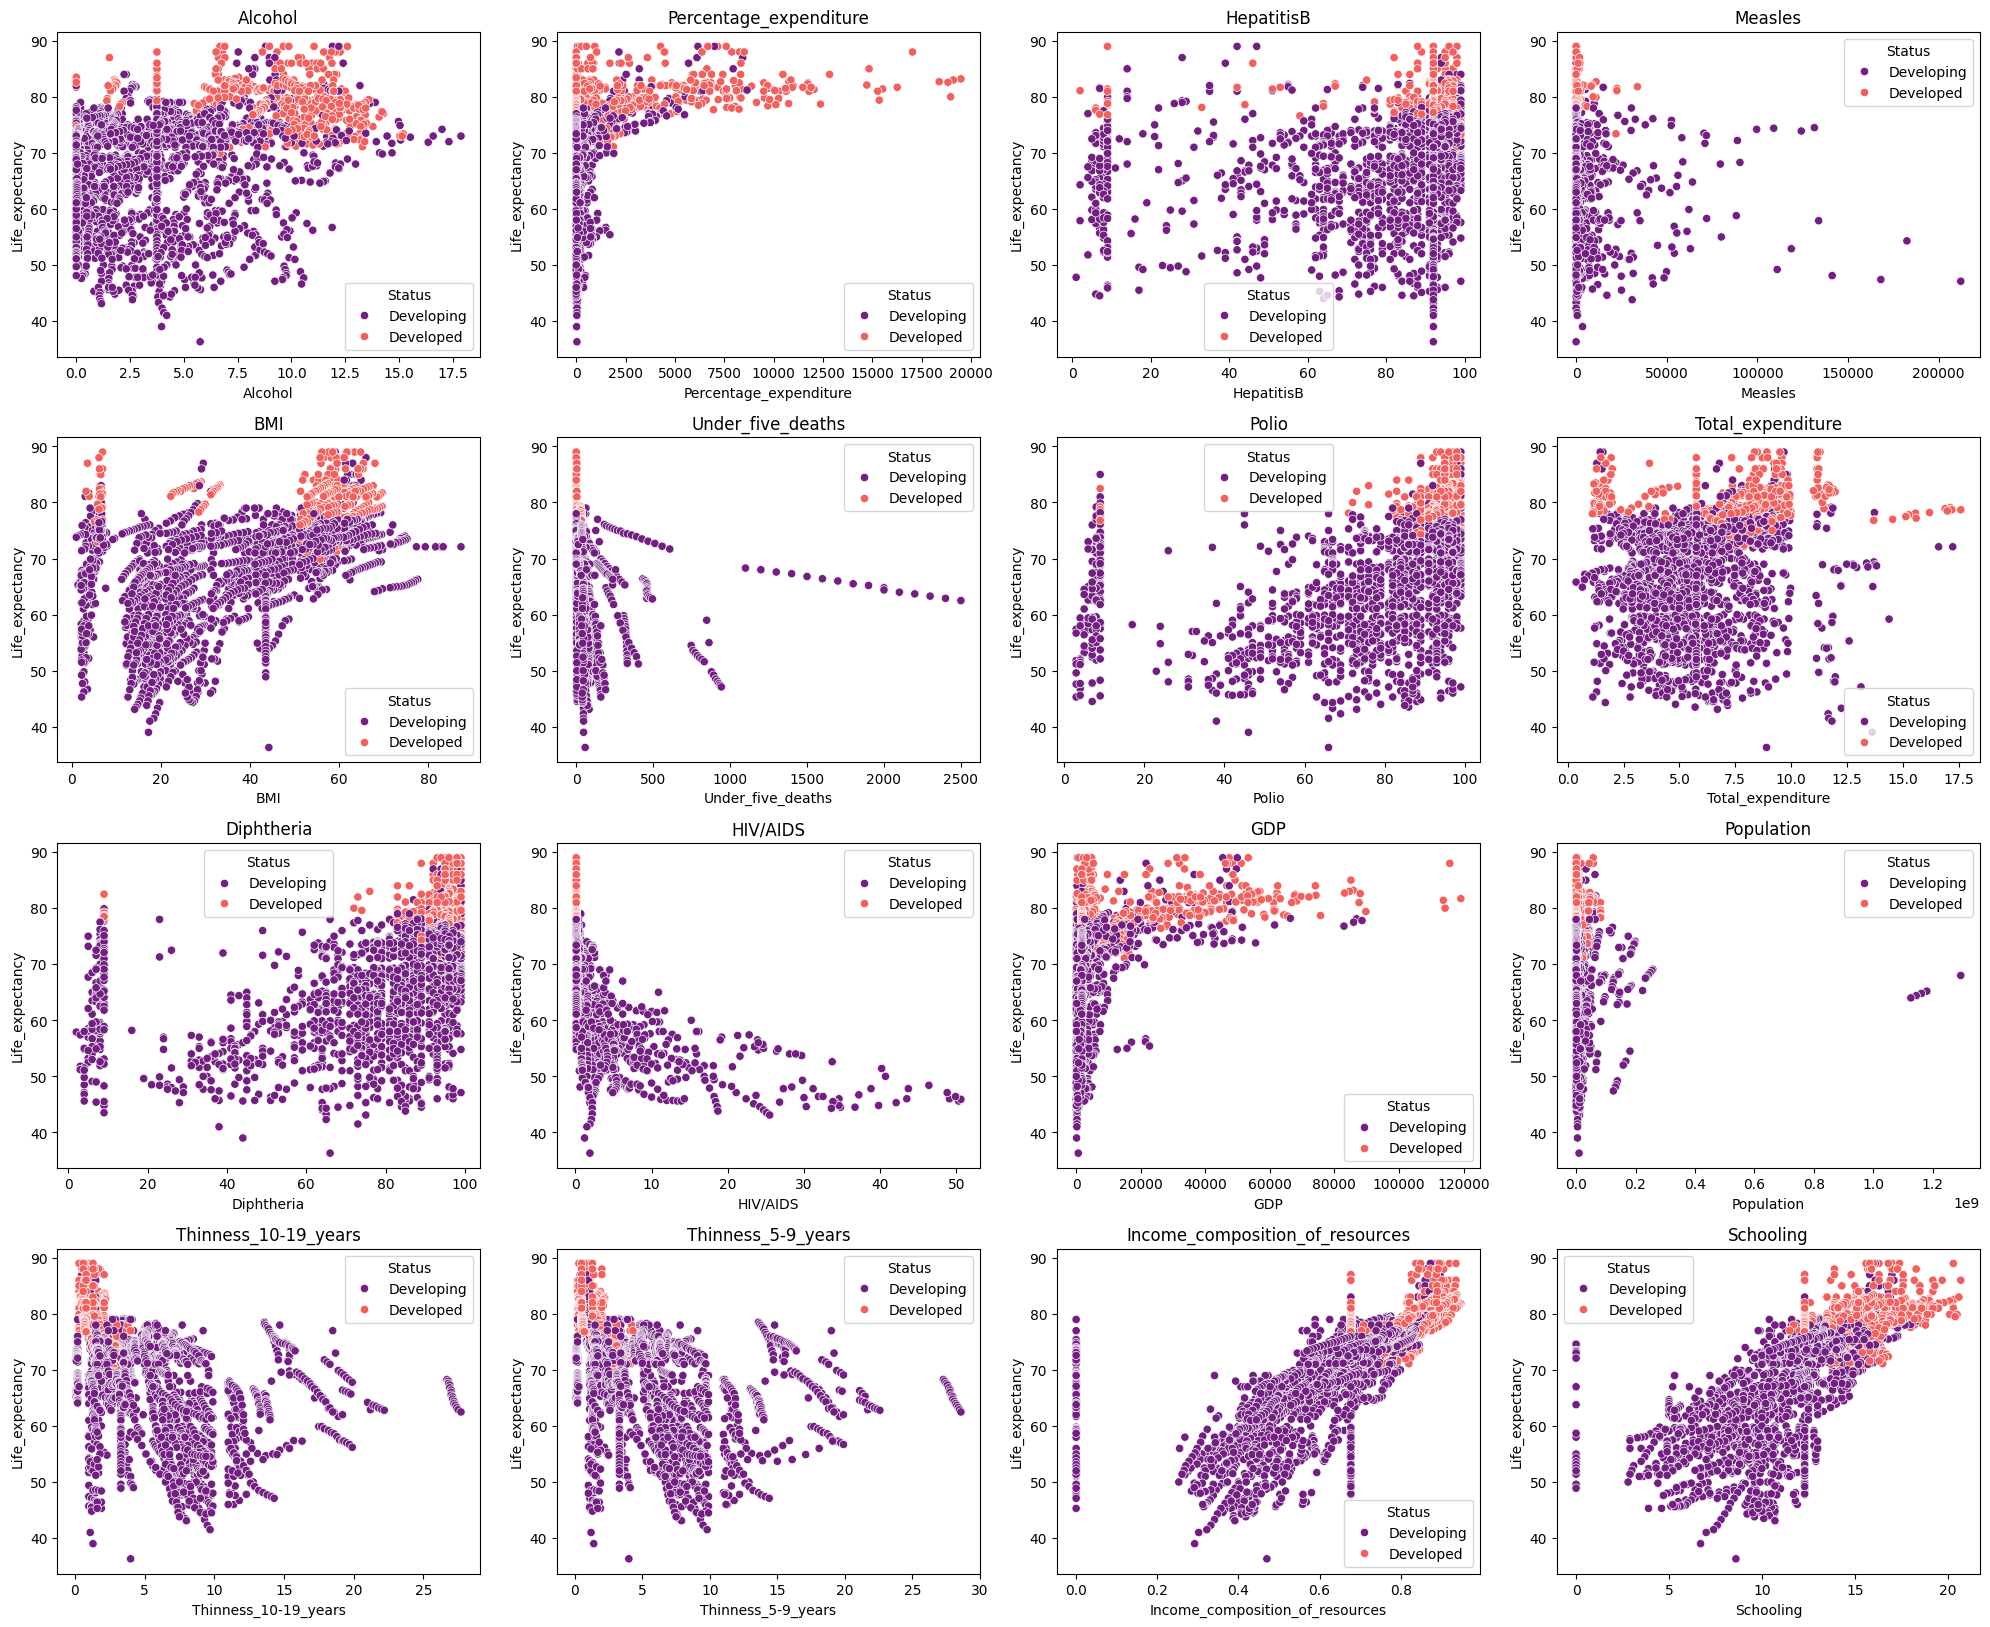

In [50]:
# Create a figure with a size of 12x12

import seaborn as sns

df5 = df2.drop(['Year','Country'], axis=1)
df5.head()

plt.figure(figsize=(20, 20))

# Iterate through each column in the DataFrame except for 'Country' and 'Year'
for i, col in enumerate(df5.columns[4:]):
    # Select the subplot for the current column
    ax = plt.subplot(5, 4, i + 1)

    # Plot the scatter plot between the current column and 'Life expectancy '
    sns.scatterplot(data=df5, x=df2[col], y=df5['Life_expectancy'], ax=ax, hue="Status", palette="magma")

    # Set the title for the subplot
    ax.set_title(col,fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Plot Chloropleth Maps

In [51]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 22.0 MB/s eta 0:00:00


In [52]:
import plotly.express as px
import plotly.express as plt
import pycountry

def get_country_code(country_name):
    try:
        country_code = pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except LookupError:
        # Handle the case where the country name is not found
        country_code = None
    return country_code
df2['Country Code'] = df2['Country'].apply(get_country_code)

SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Beli

In [53]:
# Using df1 create a chloropleth map for all the numeric columns

import plotly.express as px

# Iterate through each numeric column in df4
for col in df2.select_dtypes(include=['int64', 'float64']).drop(columns="Year").columns:
    # Create a choropleth map using Plotly Express
    fig = px.choropleth(df2, locations='Country Code', color=col,
                        hover_name='Country', color_continuous_scale='Plasma')

    # Set the title of the map
    fig.update_layout(title=f'Chloropleth Map for {col}')

    # Display the map
    fig.show()


## Correlations

In [54]:
df6= df2.drop(['Year','Country','Status', "Country Code"], axis=1)
df6.head()

Life_expectancy  Adult_mortality  Infant_deaths  Alcohol  \
0             65.0            263.0           62.0     0.01   
1             59.9            271.0           64.0     0.01   
2             59.9            268.0           66.0     0.01   
3             59.5            272.0           69.0     0.01   
4             59.2            275.0           71.0     0.01   

   Percentage_expenditure  HepatitisB  Measles   BMI  Under_five_deaths  \
0               71.279624        65.0   1154.0  19.1               83.0   
1               73.523582        62.0    492.0  18.6               86.0   
2               73.219243        64.0    430.0  18.1               89.0   
3               78.184215        67.0   2787.0  17.6               93.0   
4                7.097109        68.0   3013.0  17.2               97.0   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness_10-19_years  Thinness_5-9_years  Income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [55]:
df6.isnull().sum()

Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_10-19_years               0
Thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

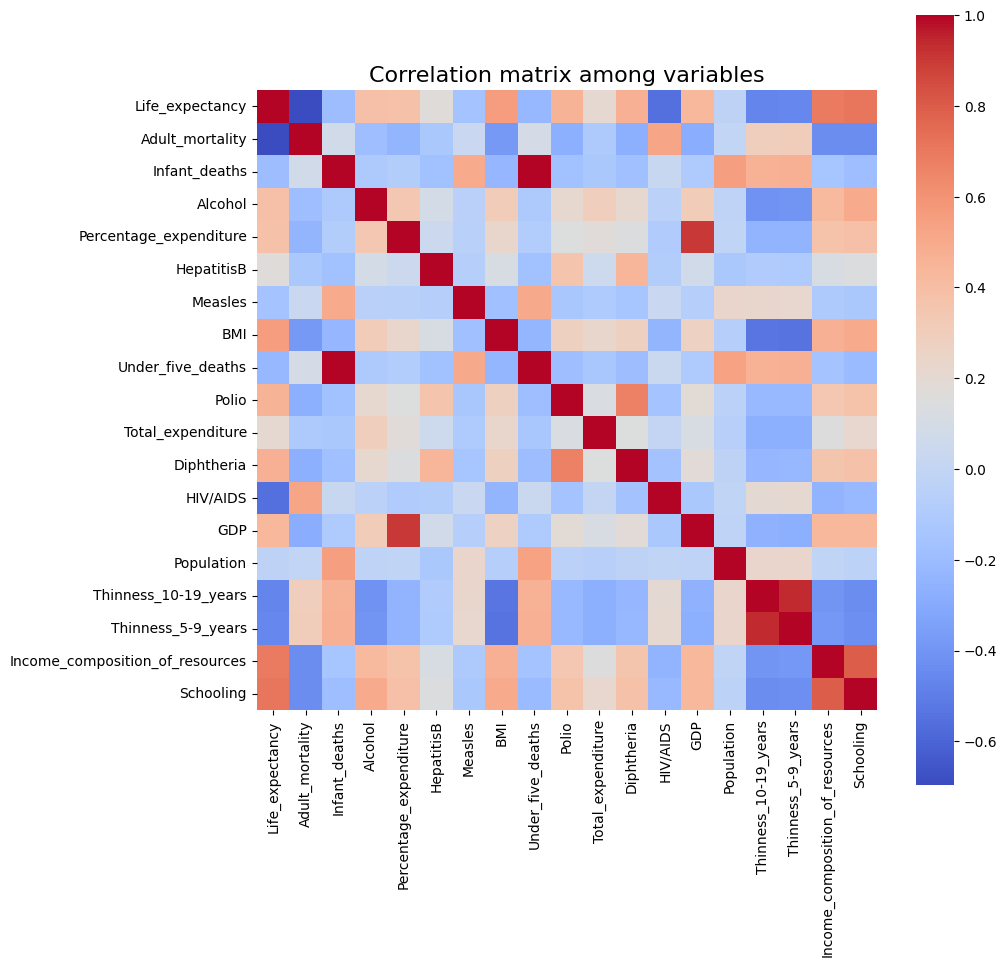

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df6.corr(), square=True, cmap="coolwarm")
plt.title("Correlation matrix among variables", fontsize=16)
plt.show()

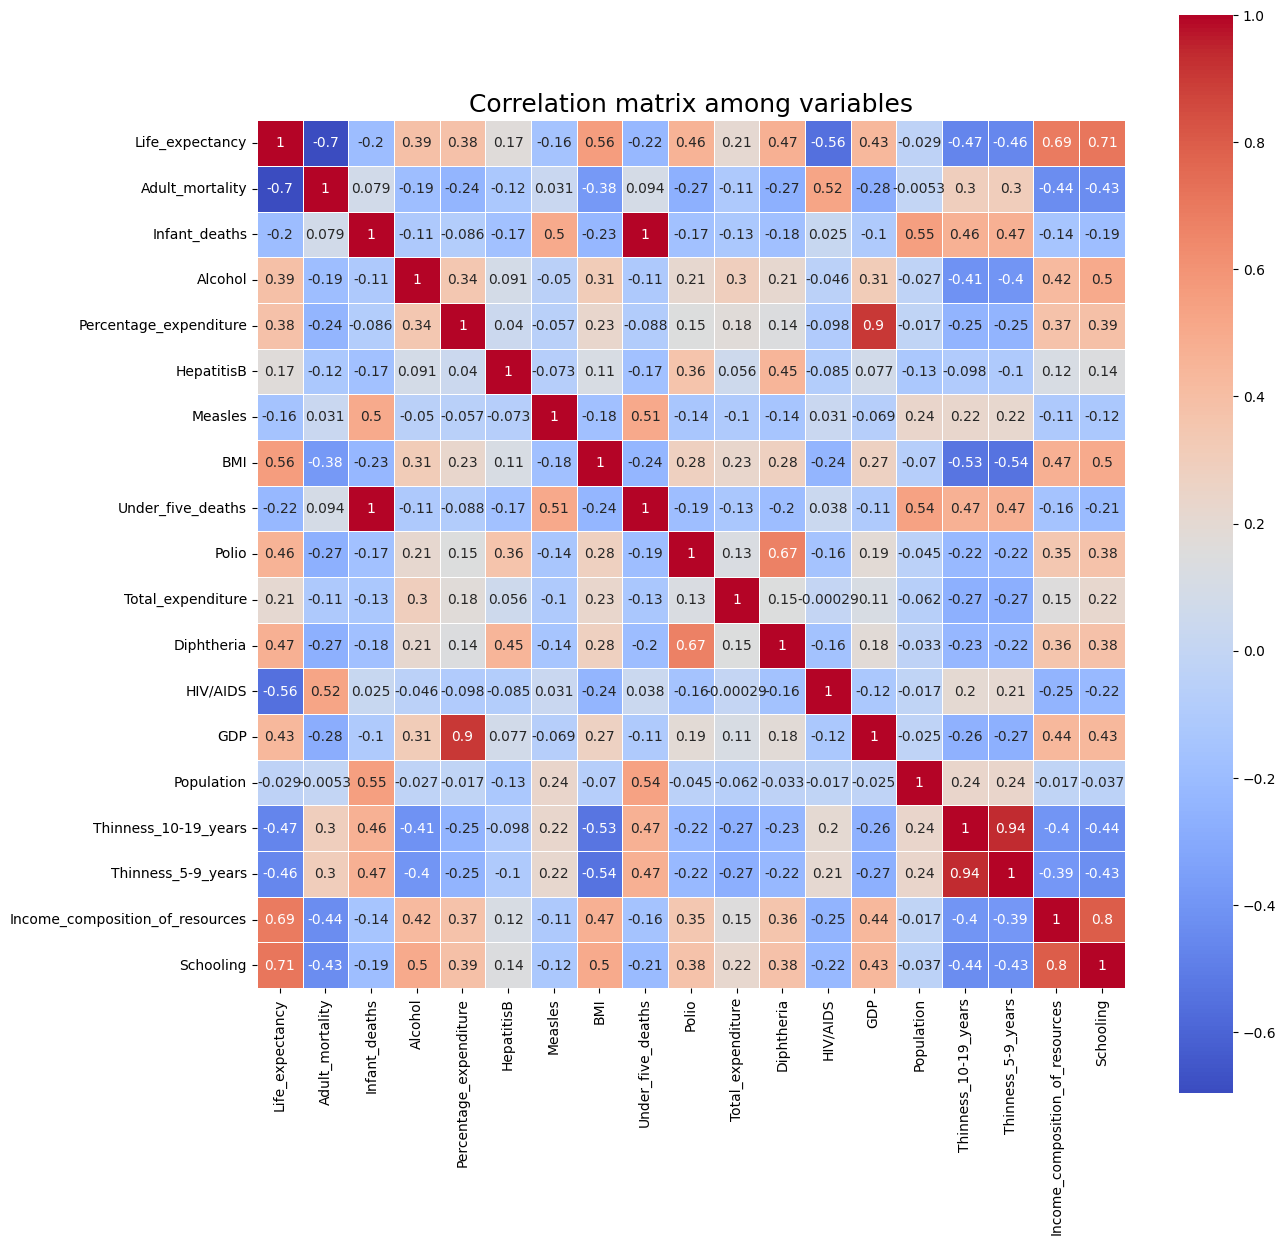

In [57]:
plt.figure(figsize=(14,14))
sns.heatmap(df6.corr(), square=True, annot=True, linewidths=.5, cmap="coolwarm")
plt.title("Correlation matrix among variables", fontsize=18)
plt.show()

In [58]:
# Color format the highest_correlations dataframe

highest_correlations = df6.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()[:10]
corr_df = pd.DataFrame(highest_correlations)
corr_df.columns = ['Correlation']
corr_df.index.name = 'Features'
corr_df.style.background_gradient(cmap='coolwarm')


In [59]:
# Show the highest negative correlation values

# Get the highest negative correlations
highest_negative_correlations = df6.corr().unstack().sort_values().drop_duplicates()[:10]

# Create a DataFrame
corr_df = pd.DataFrame(highest_negative_correlations)
corr_df.columns = ['Correlation']
corr_df.index.name = 'Features'

# Color format the DataFrame
corr_df.style.background_gradient(cmap='coolwarm')


### Under_5_Deaths and Infant_deaths have correlation values 0.99 so we can drop Under_5_Deaths.

### Thinness 5-9 years and Thinness 10-19 years have correlation values 0.93, so we can drop Thinness 5-9 years.

### GDP and Percentage_Expenditure have correlation values at 0.90, so we can drop Percentage_Expenditure.

# Machine Learning

In [60]:
df7 = df4.copy()
print(df7.shape)
df7.head()

(2413, 21)


Country  Year      Status  winz_Life_expectancy  winz_Adult_mortality  \
1   Afghanistan  2014  Developing                  59.9                 271.0   
2   Afghanistan  2013  Developing                  59.9                 268.0   
11  Afghanistan  2004  Developing                  57.0                 293.0   
12  Afghanistan  2003  Developing                  56.8                 295.0   
16      Albania  2015  Developing                  77.8                  74.0   

    winz_Alcohol  winz_HepatitisB  winz_Polio  winz_Total_expenditure  \
1           0.01             74.0        73.0                    8.18   
2           0.01             74.0        73.0                    8.13   
11          0.02             74.0        73.0                    8.79   
12          0.01             74.0        73.0                    8.82   
16          4.60             99.0        99.0                    6.00   

    winz_Diphtheria  ...  winz_Thinness_10-19_years  winz_Thinness_5-9_years  \
1              64.0  ...                        8.7                      8.7   
2              64.0  ...                        8.7                      8.7   
11             64.0  ...                        8.7                      8.7   
12             64.0  ...                        8.7                      8.7   
16             99.0  ...                        1.2                      1.3   

    winz_Income_composition_of_resources  winz_Schooling  winz_log_gdp  \
1                                  0.476            10.0      6.417870   
2                                  0.470             9.9      6.448486   
11                                 0.405             8.5      5.467686   
12                                 0.405             8.5      5.467686   
16                                 0.762            14.2      8.282541   

    winz_log_population  winz_log_Percentage_expenditure  winz_Infant_deaths  \
1             12.699494                         4.297606                23.0   
2             17.272826                         4.293458                23.0   
11            16.998510                         2.727596                23.0   
12            14.676226                         2.405958                23.0   
16            10.654054                         5.899829                 0.0   

    winz_Measles  winz_Under_five_deaths  
1          153.0                     2.0  
2          153.0                     2.0  
11         153.0                     2.0  
12         153.0                     2.0  
16           0.0                     0.0  

[5 rows x 21 columns]

In [61]:
df7 = df4.drop(['Year','Country'], axis=1)
df7.head()

Status  winz_Life_expectancy  winz_Adult_mortality  winz_Alcohol  \
1   Developing                  59.9                 271.0          0.01   
2   Developing                  59.9                 268.0          0.01   
11  Developing                  57.0                 293.0          0.02   
12  Developing                  56.8                 295.0          0.01   
16  Developing                  77.8                  74.0          4.60   

    winz_HepatitisB  winz_Polio  winz_Total_expenditure  winz_Diphtheria  \
1              74.0        73.0                    8.18             64.0   
2              74.0        73.0                    8.13             64.0   
11             74.0        73.0                    8.79             64.0   
12             74.0        73.0                    8.82             64.0   
16             99.0        99.0                    6.00             99.0   

    winz_HIV/AIDS  winz_Thinness_10-19_years  winz_Thinness_5-9_years  \
1             0.1                        8.7                      8.7   
2             0.1                        8.7                      8.7   
11            0.1                        8.7                      8.7   
12            0.1                        8.7                      8.7   
16            0.1                        1.2                      1.3   

    winz_Income_composition_of_resources  winz_Schooling  winz_log_gdp  \
1                                  0.476            10.0      6.417870   
2                                  0.470             9.9      6.448486   
11                                 0.405             8.5      5.467686   
12                                 0.405             8.5      5.467686   
16                                 0.762            14.2      8.282541   

    winz_log_population  winz_log_Percentage_expenditure  winz_Infant_deaths  \
1             12.699494                         4.297606                23.0   
2             17.272826                         4.293458                23.0   
11            16.998510                         2.727596                23.0   
12            14.676226                         2.405958                23.0   
16            10.654054                         5.899829                 0.0   

    winz_Measles  winz_Under_five_deaths  
1          153.0                     2.0  
2          153.0                     2.0  
11         153.0                     2.0  
12         153.0                     2.0  
16           0.0                     0.0

## Label Encoding

In [62]:
# Use label encoding for the status column

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df7['Status'] = label_encoder.fit_transform(df7['Status'])

print(df7['Status'].value_counts())

df7.head()

1    1937
0     476
Name: Status, dtype: int64


Status  winz_Life_expectancy  winz_Adult_mortality  winz_Alcohol  \
1        1                  59.9                 271.0          0.01   
2        1                  59.9                 268.0          0.01   
11       1                  57.0                 293.0          0.02   
12       1                  56.8                 295.0          0.01   
16       1                  77.8                  74.0          4.60   

    winz_HepatitisB  winz_Polio  winz_Total_expenditure  winz_Diphtheria  \
1              74.0        73.0                    8.18             64.0   
2              74.0        73.0                    8.13             64.0   
11             74.0        73.0                    8.79             64.0   
12             74.0        73.0                    8.82             64.0   
16             99.0        99.0                    6.00             99.0   

    winz_HIV/AIDS  winz_Thinness_10-19_years  winz_Thinness_5-9_years  \
1             0.1                        8.7                      8.7   
2             0.1                        8.7                      8.7   
11            0.1                        8.7                      8.7   
12            0.1                        8.7                      8.7   
16            0.1                        1.2                      1.3   

    winz_Income_composition_of_resources  winz_Schooling  winz_log_gdp  \
1                                  0.476            10.0      6.417870   
2                                  0.470             9.9      6.448486   
11                                 0.405             8.5      5.467686   
12                                 0.405             8.5      5.467686   
16                                 0.762            14.2      8.282541   

    winz_log_population  winz_log_Percentage_expenditure  winz_Infant_deaths  \
1             12.699494                         4.297606                23.0   
2             17.272826                         4.293458                23.0   
11            16.998510                         2.727596                23.0   
12            14.676226                         2.405958                23.0   
16            10.654054                         5.899829                 0.0   

    winz_Measles  winz_Under_five_deaths  
1          153.0                     2.0  
2          153.0                     2.0  
11         153.0                     2.0  
12         153.0                     2.0  
16           0.0                     0.0

## Apply Standard Scaler

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df7_scaled = scaler.fit_transform(df7)
df7_scaled = pd.DataFrame(df7_scaled, columns=df7.columns)
df7_scaled.head()

Status  winz_Life_expectancy  winz_Adult_mortality  winz_Alcohol  \
0  0.495723             -1.411693              1.412708     -1.224554   
1  0.495723             -1.411693              1.379544     -1.224554   
2  0.495723             -1.779947              1.655913     -1.222000   
3  0.495723             -1.805344              1.678023     -1.224554   
4  0.495723              0.861325             -0.765085     -0.052258   

   winz_HepatitisB  winz_Polio  winz_Total_expenditure  winz_Diphtheria  \
0        -1.866214   -1.825629                1.076018        -2.173057   
1        -1.866214   -1.825629                1.052119        -2.173057   
2        -1.866214   -1.825629                1.367587        -2.173057   
3        -1.866214   -1.825629                1.381927        -2.173057   
4         1.110186    0.989084                0.034015         0.904526   

   winz_HIV/AIDS  winz_Thinness_10-19_years  winz_Thinness_5-9_years  \
0      -0.645931                   1.743636                 1.742431   
1      -0.645931                   1.743636                 1.742431   
2      -0.645931                   1.743636                 1.742431   
3      -0.645931                   1.743636                 1.742431   
4      -0.645931                  -0.943078                -0.900709   

   winz_Income_composition_of_resources  winz_Schooling  winz_log_gdp  \
0                             -1.250287       -1.046925     -0.869447   
1                             -1.289141       -1.087248     -0.849215   
2                             -1.710062       -1.651760     -1.497342   
3                             -1.710062       -1.651760     -1.497342   
4                              0.601762        0.646610      0.362755   

   winz_log_population  winz_log_Percentage_expenditure  winz_Infant_deaths  \
0            -0.635194                         0.060639            1.970725   
1             1.786332                         0.059164            1.970725   
2             1.641085                        -0.497581            1.970725   
3             0.411463                        -0.611940            1.970725   
4            -1.718230                         0.630313           -0.739553   

   winz_Measles  winz_Under_five_deaths  
0      1.904161                0.877502  
1      1.904161                0.877502  
2      1.904161                0.877502  
3      1.904161                0.877502  
4     -0.689439               -1.342007

In [64]:
from sklearn.decomposition import PCA

pcs = PCA()
pcs.fit(df7_scaled)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

PC1     PC2     PC3     PC4     PC5     PC6  \
Standard deviation      2.7726  1.3982  1.2628  1.1388  1.0529  0.9271   
Proportion of variance  0.4044  0.1029  0.0839  0.0682  0.0583  0.0452   
Cumulative proportion   0.4044  0.5073  0.5912  0.6594  0.7177  0.7629   

                           PC7     PC8    PC9    PC10    PC11    PC12    PC13  \
Standard deviation      0.8875  0.7986  0.717  0.7004  0.6174  0.6022  0.5764   
Proportion of variance  0.0414  0.0336  0.027  0.0258  0.0201  0.0191  0.0175   
Cumulative proportion   0.8044  0.8379  0.865  0.8908  0.9108  0.9299  0.9474   

                          PC14    PC15    PC16    PC17    PC18    PC19  
Standard deviation      0.5730  0.5334  0.3817  0.3475  0.3060  0.1637  
Proportion of variance  0.0173  0.0150  0.0077  0.0064  0.0049  0.0014  
Cumulative proportion   0.9647  0.9796  0.9873  0.9937  0.9986  1.0000

In [65]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns,
                                index=df7.columns)
pcsComponents_df.iloc[:,:15]

PC1       PC2       PC3       PC4  \
Status                                0.222765 -0.192307 -0.169188  0.005183   
winz_Life_expectancy                 -0.324003  0.015691  0.047077  0.046784   
winz_Adult_mortality                  0.231740 -0.012449 -0.003177 -0.096637   
winz_Alcohol                         -0.212413  0.193321  0.122827 -0.124234   
winz_HepatitisB                      -0.141619 -0.521142  0.084540 -0.106262   
winz_Polio                           -0.225415 -0.474559  0.125274 -0.103161   
winz_Total_expenditure               -0.113555  0.153612  0.092912 -0.424511   
winz_Diphtheria                      -0.221087 -0.463465  0.147413 -0.125013   
winz_HIV/AIDS                         0.266983  0.053254  0.005696  0.012575   
winz_Thinness_10-19_years             0.260227 -0.276507  0.003424  0.347111   
winz_Thinness_5-9_years               0.261860 -0.272208  0.009303  0.344791   
winz_Income_composition_of_resources -0.317150  0.033014  0.111422  0.151877   
winz_Schooling                       -0.311469  0.054569  0.105589  0.108726   
winz_log_gdp                         -0.246266  0.082247  0.093207  0.425220   
winz_log_population                   0.031807  0.041435  0.577696 -0.034483   
winz_log_Percentage_expenditure      -0.176330  0.124517  0.026906  0.483121   
winz_Infant_deaths                    0.238813  0.055277  0.407334 -0.095063   
winz_Measles                          0.112580  0.073990  0.447487  0.223111   
winz_Under_five_deaths                0.215199  0.008916  0.409700 -0.081269   

                                           PC5       PC6       PC7       PC8  \
Status                               -0.310694 -0.327192 -0.309150  0.045379   
winz_Life_expectancy                 -0.221423  0.076207 -0.027150 -0.119895   
winz_Adult_mortality                  0.350184 -0.277781  0.240275  0.342868   
winz_Alcohol                          0.443089 -0.001700  0.397195 -0.046671   
winz_HepatitisB                       0.147058  0.021889 -0.004403  0.168279   
winz_Polio                            0.065567 -0.010804 -0.020199  0.089991   
winz_Total_expenditure                0.376814  0.142090 -0.626330 -0.358234   
winz_Diphtheria                       0.084378 -0.028133 -0.050886  0.100487   
winz_HIV/AIDS                         0.418613 -0.096026 -0.005151  0.074808   
winz_Thinness_10-19_years             0.173180  0.118926  0.020277 -0.393076   
winz_Thinness_5-9_years               0.174192  0.119139  0.029412 -0.384403   
winz_Income_composition_of_resources -0.082900  0.006269  0.081044 -0.070587   
winz_Schooling                       -0.005072 -0.027784  0.066506 -0.100354   
winz_log_gdp                          0.127283 -0.182395 -0.123909  0.094666   
winz_log_population                  -0.147181 -0.489913  0.197313 -0.389790   
winz_log_Percentage_expenditure       0.247841 -0.279664 -0.416775  0.232010   
winz_Infant_deaths                   -0.052086  0.020024 -0.142853  0.027188   
winz_Measles                         -0.052717  0.620772 -0.014713  0.299708   
winz_Under_five_deaths               -0.114894 -0.113014 -0.178835  0.246513   

                                           PC9      PC10      PC11      PC12  \
Status                               -0.328099  0.087131  0.500291  0.113934   
winz_Life_expectancy                 -0.084317 -0.071444 -0.022757  0.020078   
winz_Adult_mortality                 -0.599250  0.160897 -0.252221 -0.153426   
winz_Alcohol                          0.023691 -0.214990  0.434980  0.174316   
winz_HepatitisB                       0.296225  0.153560  0.217623 -0.679413   
winz_Polio                           -0.061318 -0.015098 -0.127722  0.359726   
winz_Total_expenditure               -0.232174  0.129199  0.026486 -0.093125   
winz_Diphtheria                      -0.047485 -0.048326 -0.124291  0.427496   
winz_HIV/AIDS                         0.264158 -0.033851  0.148627  0.158681   
winz_Thinness_10-19_years            -0.1

## PCA Visualization

In [66]:
!pip install plotly

In [67]:
import plotly.graph_objects as go

# Create a 2D scatter plot with the first 2 principal components
fig = go.Figure(data=go.Scatter(
    x=pcsComponents_df.iloc[:, 0],
    y=pcsComponents_df.iloc[:, 1],
    text=pcsComponents_df.index,
    mode='markers+text',
    marker=dict(
        size=10,
        color='blue',
        opacity=0.8
    )
))

# Update the layout
fig.update_layout(
    title='2D Scatter Plot of the First 2 Principal Components',
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC2'),xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False
)

# Increase the size of the figure
fig.update_layout(width=1000, height=600)


# Show the plot
fig.show()


## Linear Regression with PCA

In [68]:
X = df7_scaled.drop(columns=['winz_Life_expectancy'])
y = df7['winz_Life_expectancy']

In [69]:
print(X.shape)
print(y.shape)

(2413, 18)
(2413,)


In [70]:
# Perform PCA
pca = PCA(n_components=15)  # Choose number of components
X_pca = pca.fit_transform(X)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)

# Calculate R-squared
r2_lr = r2_score(y_test, y_pred)
print("R-squared:", r2_lr)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_lr)

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse_lr)

# Calculate MAE
mae_lr = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_lr)

R-squared: 0.8410626938001433
Mean Squared Error: 9.605733126454588
Root Mean Squared Error: 3.099311718181085
Mean Absolute Error: 2.3584137571564767


In [72]:
def regressionSummary(y_true, y_pred):
    # Calculate performance measures
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Print results
    print("Performance measures:")
    print("--------------------")
    print(f"R^2: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

In [73]:
# print performance measures
regressionSummary(y_test, model_lr.predict(X_test))

Performance measures:
--------------------
R^2: 0.8411
MSE: 9.6057
RMSE: 3.0993


In [74]:
# print performance measures
regressionSummary(y_train, model_lr.predict(X_train))

Performance measures:
--------------------
R^2: 0.8329
MSE: 10.4253
RMSE: 3.2288


In [75]:
# Show the feature importances as a dataframe

importances = model_lr.coef_
features = X.columns
indices = np.argsort(importances)

df_importances = pd.DataFrame({'Feature': features[indices], 'Importance': importances[indices]})

df_importances

Feature  Importance
0                                 Status   -2.608709
1                          winz_HIV/AIDS   -0.845062
2              winz_Thinness_10-19_years   -0.582521
3                    winz_log_population   -0.525537
4                        winz_Diphtheria   -0.276569
5   winz_Income_composition_of_resources   -0.151115
6        winz_log_Percentage_expenditure   -0.129823
7                   winz_Adult_mortality    0.093900
8                         winz_Schooling    0.171602
9                        winz_HepatitisB    0.299810
10                          winz_Alcohol    0.348976
11                          winz_log_gdp    0.357005
12               winz_Thinness_5-9_years    0.690002
13                winz_Total_expenditure    0.732696
14                            winz_Polio    1.664227

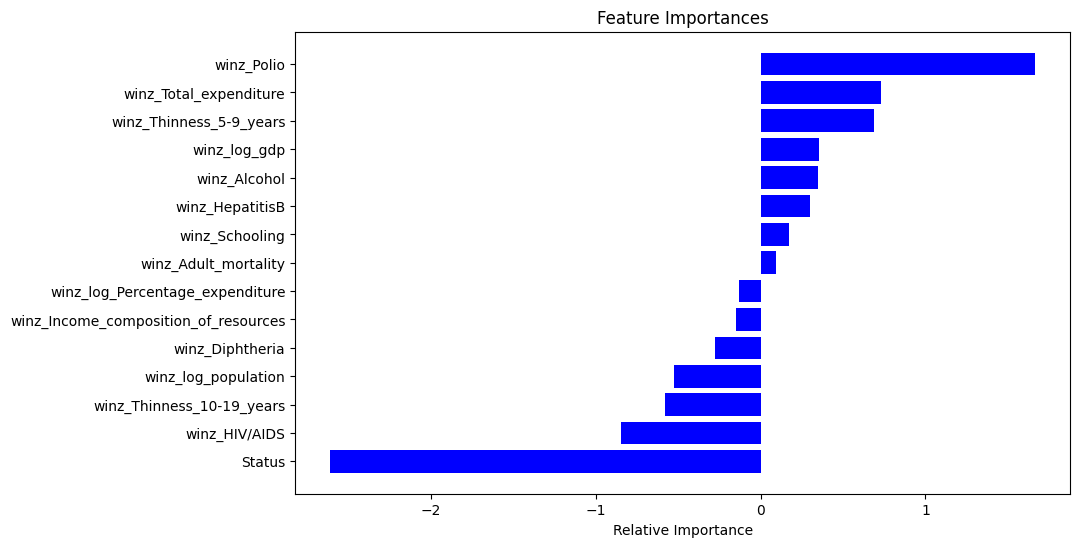

In [76]:
# Plot the feature importances for model_lr

importances = model_lr.coef_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


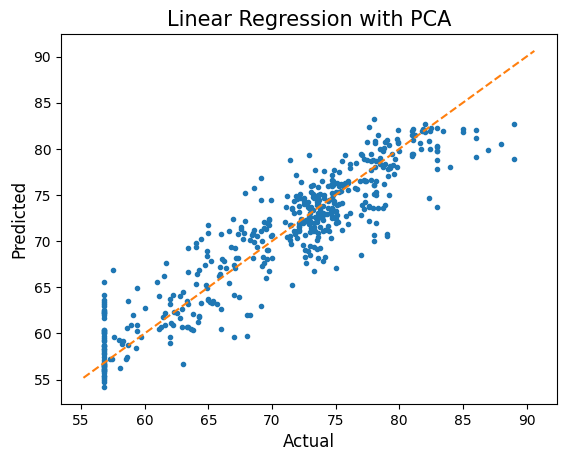

In [77]:
import matplotlib.pylab as plt

plt.plot(y_test, y_pred, '.')
plt.xlabel('Actual', fontsize=12)  # set x-axis label
plt.ylabel('Predicted', fontsize=12)  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.title('Linear Regression with PCA', fontsize=15)
plt.show()

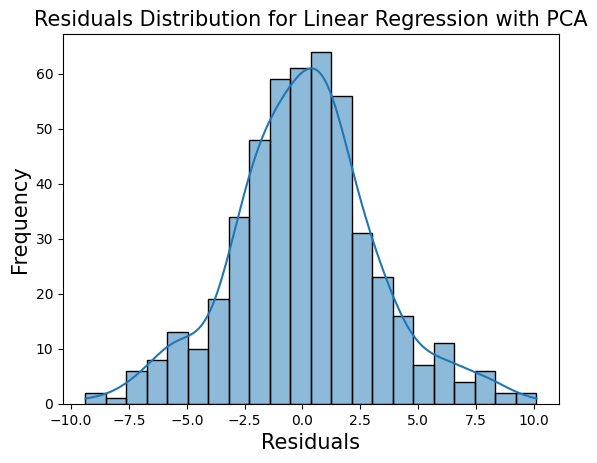

In [78]:
# Plot the residuals as histogram

sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Residuals Distribution for Linear Regression with PCA', fontsize=15)

plt.show()


## Linear Regression with Lasso

In [79]:
# Fit a linear regression model with Lasso regression using df7 without PCA

X_lasso = df7_scaled.drop(columns=['winz_Life_expectancy'])
y_lasso = df7['winz_Life_expectancy']

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

model_lasso = Lasso()
model_lasso.fit(X_train_lasso, y_train_lasso)

y_pred_lasso = model_lasso.predict(X_test_lasso)

r2_lasso = r2_score(y_test_lasso, y_pred_lasso)
print("R-squared:", r2_lasso)

mse_lasso = mean_squared_error(y_test_lasso, y_pred_lasso)
print("Mean Squared Error:", mse_lasso)

rmse_lasso = np.sqrt(mean_squared_error(y_test_lasso, y_pred_lasso))
print("Root Mean Squared Error:", rmse_lasso)

mae_lasso = mean_absolute_error(y_test_lasso, y_pred_lasso)
print("Mean Absolute Error:", mae_lasso)


R-squared: 0.8081274588109981
Mean Squared Error: 11.596248036559963
Root Mean Squared Error: 3.4053264214403827
Mean Absolute Error: 2.6048593262206285


In [80]:
# print performance measures
regressionSummary(y_train_lasso, model_lasso.predict(X_train_lasso))

Performance measures:
--------------------
R^2: 0.8013
MSE: 12.3932
RMSE: 3.5204


In [81]:
# Create a dataframe with the plot the feature importances

importances = model_lasso.coef_
features = X_lasso.columns
indices = np.argsort(importances)

df_importances_lasso = pd.DataFrame({'Feature': features[indices], 'Importance': importances[indices]})

df_importances_lasso


Feature  Importance
0                          winz_HIV/AIDS   -1.788303
1                   winz_Adult_mortality   -1.011204
2                winz_Thinness_5-9_years   -0.525520
3                     winz_Infant_deaths   -0.098442
4                                 Status   -0.000000
5        winz_log_Percentage_expenditure    0.000000
6                    winz_log_population   -0.000000
7                           winz_log_gdp    0.000000
8              winz_Thinness_10-19_years   -0.000000
9                 winz_Total_expenditure    0.000000
10                            winz_Polio    0.000000
11                       winz_HepatitisB    0.000000
12                          winz_Alcohol    0.000000
13                          winz_Measles   -0.000000
14                winz_Under_five_deaths   -0.000000
15                       winz_Diphtheria    0.122921
16                        winz_Schooling    0.228673
17  winz_Income_composition_of_resources    3.300650

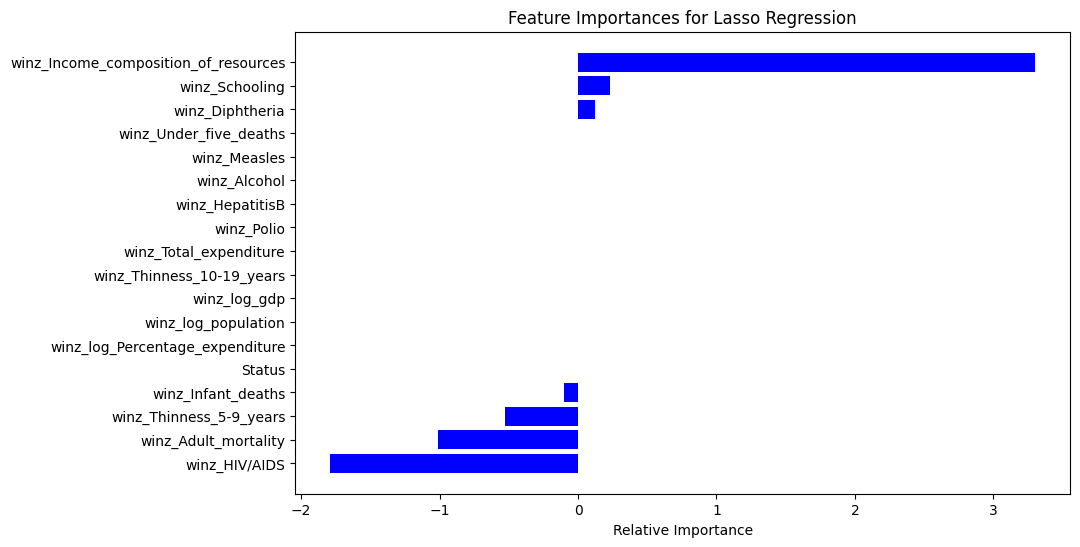

In [82]:
# Plot the feature importances

importances = model_lasso.coef_
features = X_lasso.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Lasso Regression')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


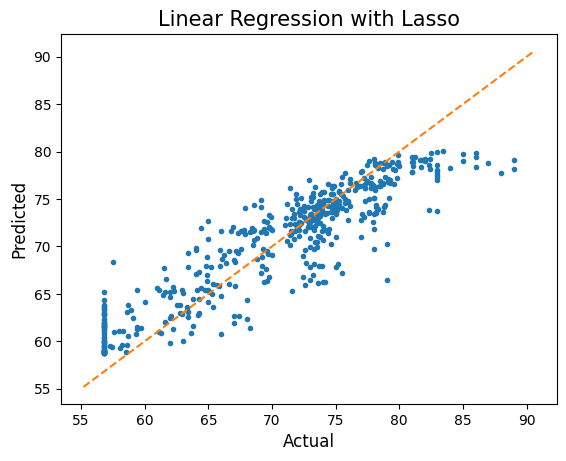

In [83]:
plt.plot(y_test_lasso, y_pred_lasso, '.')
plt.xlabel('Actual', fontsize=12)  # set x-axis label
plt.ylabel('Predicted', fontsize=12)  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.title('Linear Regression with Lasso', fontsize=15)
plt.show()

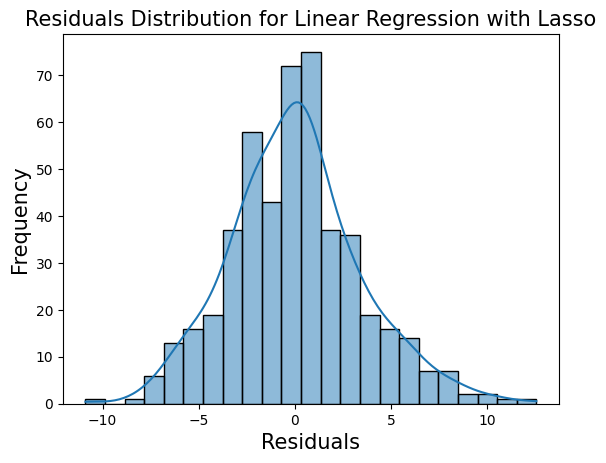

In [84]:

sns.histplot(y_test_lasso - y_pred_lasso, kde=True)
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Residuals Distribution for Linear Regression with Lasso', fontsize=15)
plt.show()

## Linear Regression with Ridge

In [85]:
# Fit a Linear regression model with Ridge regression with df7_scaled without PCA

X_ridge = df7_scaled.drop(columns=['winz_Life_expectancy'])
y_ridge = df7['winz_Life_expectancy']

X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_ridge, y_ridge, test_size=0.2, random_state=42)

model_ridge = Ridge()
model_ridge.fit(X_train_ridge, y_train_ridge)

y_pred_ridge = model_ridge.predict(X_test_ridge)

r2_ridge = r2_score(y_test_ridge, y_pred_ridge)
print("R-squared:", r2_ridge)

mse_ridge = mean_squared_error(y_test_ridge, y_pred_ridge)
print("Mean Squared Error:", mse_ridge)

rmse_ridge = np.sqrt(mean_squared_error(y_test_ridge, y_pred_ridge))
print("Root Mean Squared Error:", rmse_ridge)

mae_ridge = mean_absolute_error(y_test_ridge, y_pred_ridge)
print("Mean Absolute Error:", mae_ridge)


R-squared: 0.8452120028484558
Mean Squared Error: 9.35496031338606
Root Mean Squared Error: 3.058587960707696
Mean Absolute Error: 2.3040842816578557


In [86]:
# print performance measures
regressionSummary(y_train_ridge, model_ridge.predict(X_train_ridge))

Performance measures:
--------------------
R^2: 0.8391
MSE: 10.0397
RMSE: 3.1686


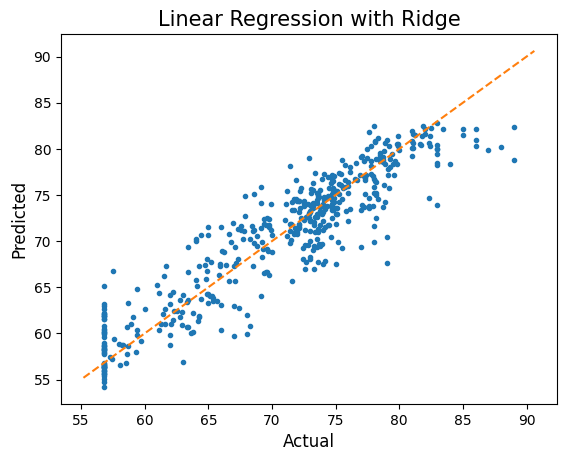

In [87]:

plt.plot(y_test_ridge, y_pred_ridge, '.')
plt.xlabel('Actual', fontsize=12)  # set x-axis label
plt.ylabel('Predicted', fontsize=12)  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.title('Linear Regression with Ridge', fontsize=15)
plt.show()

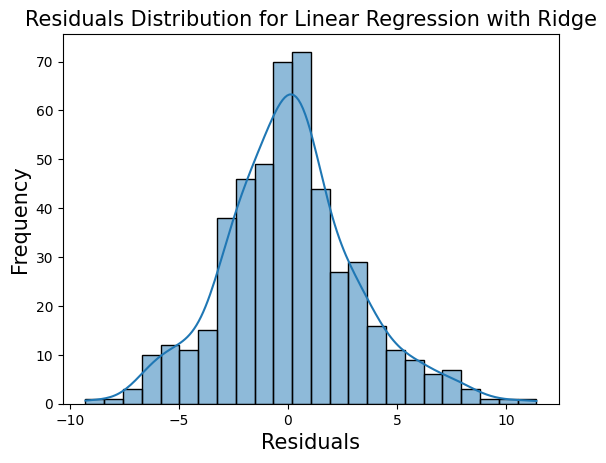

In [88]:

sns.histplot(y_test_ridge - y_pred_ridge, kde=True)
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Residuals Distribution for Linear Regression with Ridge', fontsize=15)
plt.show()

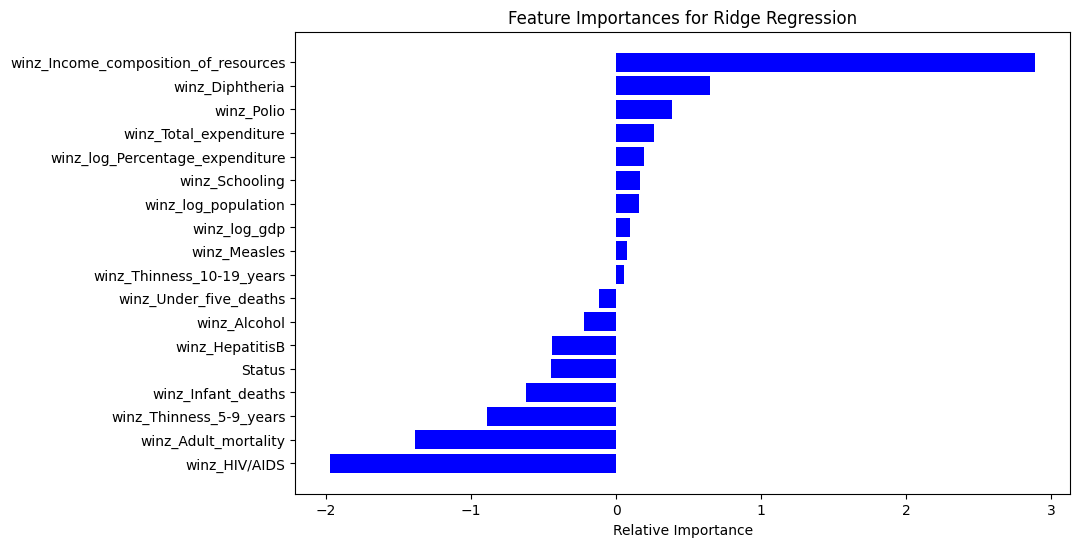

In [89]:
# Plot the feature importances for ridge regression

importances = model_ridge.coef_
features = X_ridge.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Ridge Regression')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Backward Elimination Method

In [90]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.9 MB/s eta 0:00:00


In [91]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector


import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

Colab environment detected.


In [92]:
# Fit a backward elimination linear regression model


X_backward = df7_scaled.drop(columns=['winz_Life_expectancy'])
y_backward = df7['winz_Life_expectancy']

X_train_backward, X_test_backward, y_train_backward, y_test_backward = train_test_split(X_backward, y_backward, test_size=0.2, random_state=42)

model_backward = SequentialFeatureSelector(LinearRegression(),
                                           k_features=(1,18),
                                           forward=False,
                                           verbose=2,
                                           floating= False,
                                           scoring='r2',
                                           cv=5)

model_backward.fit(X, y)


[2024-03-11 19:29:59] Features: 17/1 -- score: 0.82057517201477
[2024-03-11 19:29:59] Features: 16/1 -- score: 0.8217940755304485
[2024-03-11 19:29:59] Features: 15/1 -- score: 0.822281206071749
[2024-03-11 19:29:59] Features: 14/1 -- score: 0.8226853172028221
[2024-03-11 19:30:00] Features: 13/1 -- score: 0.8228953066778907
[2024-03-11 19:30:00] Features: 12/1 -- score: 0.8230354405452189
[2024-03-11 19:30:00] Features: 11/1 -- score: 0.8230146528761686
[2024-03-11 19:30:00] Features: 10/1 -- score: 0.8229705003107721
[2024-03-11 19:30:00] Features: 9/1 -- score: 0.8229158762925717
[2024-03-11 19:30:00] Features: 8/1 -- score: 0.8226256781911976
[2024-03-11 19:30:01] Features: 7/1 -- score: 0.822282033168696
[2024-03-11 19:30:01] Features: 6/1 -- score: 0.8215349175914621
[2024-03-11 19:30:01] Features: 5/1 -- score: 0.8178987786028049
[2024-03-11 19:30:01] Features: 4/1 -- score: 0.8129213683941442
[2024-03-11 19:30:01] Features: 3/1 -- score: 0.8014323552374318
[2024-03-11 19:30:01

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 18), scoring='r2', verbose=2)

In [93]:
model_backward.k_feature_names_

('Status',
 'winz_Adult_mortality',
 'winz_HepatitisB',
 'winz_Polio',
 'winz_Diphtheria',
 'winz_HIV/AIDS',
 'winz_Thinness_10-19_years',
 'winz_Thinness_5-9_years',
 'winz_Income_composition_of_resources',
 'winz_log_gdp',
 'winz_log_population',
 'winz_Infant_deaths')

In [94]:
model_backward.k_feature_idx_

(0, 1, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15)

In [95]:
r2_backward = model_backward.k_score_
print("R-squared Backward Selection:", r2_backward)

R-squared Backward Selection: 0.8230354405452189


In [96]:
# Create a dataframe using the idx and the k-feature names with rsquare values

df_backward = pd.DataFrame({
    'idx': model_backward.k_feature_idx_,
    'feature_name': model_backward.k_feature_names_,

})

df_backward

idx                          feature_name
0     0                                Status
1     1                  winz_Adult_mortality
2     3                       winz_HepatitisB
3     4                            winz_Polio
4     6                       winz_Diphtheria
5     7                         winz_HIV/AIDS
6     8             winz_Thinness_10-19_years
7     9               winz_Thinness_5-9_years
8    10  winz_Income_composition_of_resources
9    12                          winz_log_gdp
10   13                   winz_log_population
11   15                    winz_Infant_deaths

In [97]:
#pd.set_option('display.max_colwidth', 1000)
pd.DataFrame.from_dict(model_backward.get_metric_dict()).T

feature_idx  \
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,...   
15  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,...   
14     (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15)   
13        (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15)   
12           (0, 1, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15)   
11              (0, 1, 3, 6, 7, 8, 9, 10, 12, 13, 15)   
10                  (0, 1, 3, 6, 7, 8, 9, 10, 13, 15)   
9                       (0, 1, 3, 6, 7, 8, 9, 10, 15)   
8                          (0, 1, 3, 6, 7, 9, 10, 15)   
7                             (0, 1, 6, 7, 9, 10, 15)   
6                                (1, 6, 7, 9, 10, 15)   
5                                    (1, 6, 7, 9, 10)   
4                                       (1, 7, 9, 10)   
3                                          (1, 7, 10)   
2                                             (7, 10)   
1                                               (10,)   

                                            cv_scores avg_score  \
18  [0.8441072036080126, 0.8407308272492953, 0.763...  0.819195   
17  [0.8439634773461193, 0.8401613514094449, 0.762...  0.820575   
16  [0.8439673817279498, 0.8402746596029743, 0.767...  0.821794   
15  [0.8436892587652975, 0.841070118094877, 0.7693...  0.822281   
14  [0.8438191106481913, 0.8410594689332739, 0.769...  0.822685   
13  [0.8456213455465335, 0.8388204523465336, 0.766...  0.822895   
12  [0.8452924353772768, 0.8385473257097638, 0.766...  0.823035   
11  [0.8450772916580604, 0.8392982737526493, 0.765...  0.823015   
10  [0.843761718566914, 0.838306563849246, 0.76579...  0.822971   
9   [0.8422260246063266, 0.8366647733482928, 0.768...  0.822916   
8   [0.8419667788153632, 0.8368929818151303, 0.767...  0.822626   
7   [0.844826855908476, 0.8329662922659193, 0.7659...  0.822282   
6   [0.8393025376841451, 0.839706688151937, 0.7677...  0.821535   
5   [0.8295581549370664, 0.8366548553924893, 0.771...  0.817899   
4   [0.8238695806506822, 0.8231083283062084, 0.770...  0.812921   
3   [0.8287902179857469, 0.8063655357404376, 0.771...  0.801432   
2   [0.7930356917082673, 0.7993838484404303, 0.726...  0.773791   
1   [0.6702870123506232, 0.719648035780413, 0.7690...   0.69655   

                                        feature_names  ci_bound   std_dev  \
18  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.041857  0.032566   
17  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.042572  0.033123   
16  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.040164  0.031249   
15  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.039302  0.030578   
14  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.039484   0.03072   
13  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.039896  0.031041   
12  (Status, winz_Adult_mortality, winz_HepatitisB...  0.040041  0.031153   
11  (Status, winz_Adult_mortality, winz_HepatitisB...  0.040527  0.031531   
10  (Status, winz_Adult_mortality, winz_HepatitisB...  0.040339  0.031385   
9   (Status, winz_Adult_mortality, winz_HepatitisB...  0.038249  0.029759   
8   (Status, winz_Adult_mortality, winz_HepatitisB...  0.038425  0.029896   
7   (Status, winz_Adult_mortality, winz_Diphtheria...  0.039246  0.030535   
6   (winz_Adult_mortality, winz_Diphtheria, winz_H...  0.036903  0.028712   
5   (winz_Adult_mortality, winz_Diphtheria, winz_H...  0.032484  0.025274   
4   (winz_Adult_mortality, winz_HIV/AIDS, winz_Thi...  0.031742  0.024696   
3   (winz_Adult_mortality, winz_HIV/AIDS, winz_Inc...      0.03  0.023341   
2   (winz_HIV/AIDS, winz_Income_composition_of_res...  0.037481  0.029162   
1             (winz_Income_composition_of_resources,)  0.058423  0.045455   

     std_err  
18  0.016283  
17  0.016561  
16  0.015624  
15  0.015289  
14   0.01536  
13   0.01552  
12  0.015577  
11  0.015766  
10  0.015693  
9   0.014879  
8   0.014948  
7   0.015267  
6   0.014356  
5   0.0126

In [98]:
# Fit a linear regression model using the selected features from backward elimination

X_selected_backward = df_backward['feature_name'].tolist()
X_train_selected_backward = X_train_backward[X_selected_backward]
X_test_selected_backward = X_test_backward[X_selected_backward]

model_backward_selected = LinearRegression()
model_backward_selected.fit(X_train_selected_backward, y_train_backward)

y_pred_backward_selected = model_backward_selected.predict(X_test_selected_backward)

r2_backward_selected = r2_score(y_test_backward, y_pred_backward_selected)
print("R-squared Backward Selection Selected Features:", r2_backward_selected)

mse_backward_selected = mean_squared_error(y_test_backward, y_pred_backward_selected)
print("Mean Squared Error:", mse_backward_selected)

rmse_backward_selected = np.sqrt(mean_squared_error(y_test_backward, y_pred_backward_selected))
print("Root Mean Squared Error:", rmse_backward_selected)

mae_backward_selected = mean_absolute_error(y_test_backward, y_pred_backward_selected)
print("Mean Absolute Error:", mae_backward_selected)


R-squared Backward Selection Selected Features: 0.8436043159019853
Mean Squared Error: 9.452124485397766
Root Mean Squared Error: 3.0744307579449184
Mean Absolute Error: 2.3176616500349483


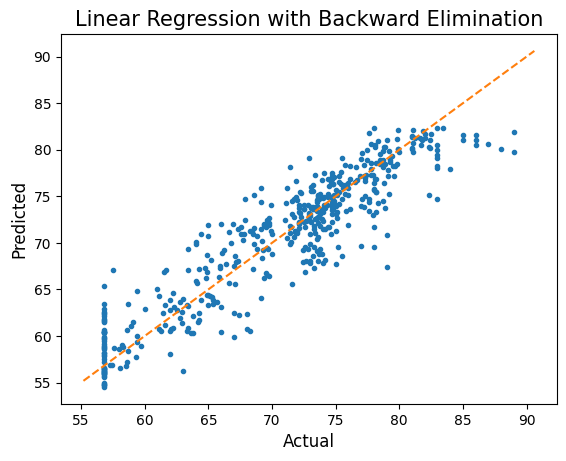

In [99]:
# Plot a scatter plot of y_test and y_pred

plt.plot(y_test_backward, y_pred_backward_selected, '.')
plt.xlabel('Actual', fontsize=12)  # set x-axis label
plt.ylabel('Predicted', fontsize=12)  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.title('Linear Regression with Backward Elimination', fontsize=15)
plt.show()


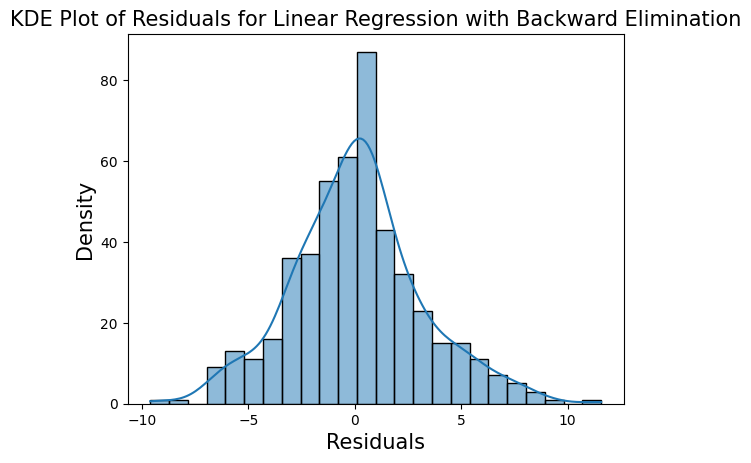

In [100]:
# prompt: plot a kde plot of the residuals

sns.histplot(y_test_backward - y_pred_backward_selected, kde=True)
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('KDE Plot of Residuals for Linear Regression with Backward Elimination', fontsize=15)
plt.show()


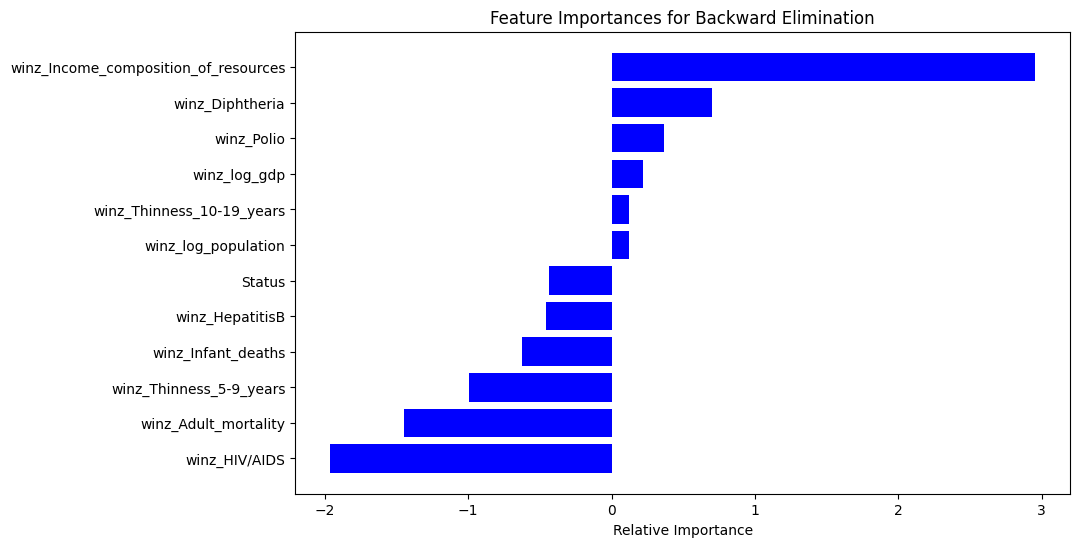

In [101]:
# Plot the feature importances using backward elimination

importances = model_backward_selected.coef_
features = X_selected_backward
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Backward Elimination')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Forward Elimination Method

In [102]:
# Fit a forward elimination regression model to the above data


model_forward = SequentialFeatureSelector(LinearRegression(),
                                          k_features=(1,18),
                                          forward=True,
                                          verbose=2,
                                          floating= False,
                                          scoring='r2',
                                          cv=5)

model_forward.fit(X, y)


[2024-03-11 19:30:02] Features: 1/18 -- score: 0.6965501828940625
[2024-03-11 19:30:02] Features: 2/18 -- score: 0.7737907125277725
[2024-03-11 19:30:02] Features: 3/18 -- score: 0.8014323552374318
[2024-03-11 19:30:03] Features: 4/18 -- score: 0.8129213683941442
[2024-03-11 19:30:03] Features: 5/18 -- score: 0.8178987786028049
[2024-03-11 19:30:03] Features: 6/18 -- score: 0.8215349175914621
[2024-03-11 19:30:03] Features: 7/18 -- score: 0.822282033168696
[2024-03-11 19:30:03] Features: 8/18 -- score: 0.8226256781911976
[2024-03-11 19:30:03] Features: 9/18 -- score: 0.8229158762925717
[2024-03-11 19:30:04] Features: 10/18 -- score: 0.8229705003107721
[2024-03-11 19:30:04] Features: 11/18 -- score: 0.8230146528761686
[2024-03-11 19:30:04] Features: 12/18 -- score: 0.8230354405452189
[2024-03-11 19:30:04] Features: 13/18 -- score: 0.8228953066778907
[2024-03-11 19:30:04] Features: 14/18 -- score: 0.8226853172028221
[2024-03-11 19:30:04] Features: 15/18 -- score: 0.822281206071749
[2024

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 18),
                          scoring='r2', verbose=2)

In [103]:
model_forward.k_feature_names_

('Status',
 'winz_Adult_mortality',
 'winz_HepatitisB',
 'winz_Polio',
 'winz_Diphtheria',
 'winz_HIV/AIDS',
 'winz_Thinness_10-19_years',
 'winz_Thinness_5-9_years',
 'winz_Income_composition_of_resources',
 'winz_log_gdp',
 'winz_log_population',
 'winz_Infant_deaths')

In [104]:
model_forward.k_feature_idx_

(0, 1, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15)

In [105]:
r2_forward = model_forward.k_score_
print("R-squared Forward Selection:", r2_forward)

R-squared Forward Selection: 0.8230354405452189


In [106]:
df_forward = pd.DataFrame({
    'idx': model_forward.k_feature_idx_,
    'feature_name': model_forward.k_feature_names_,

}).reset_index(drop=True)

df_forward

idx                          feature_name
0     0                                Status
1     1                  winz_Adult_mortality
2     3                       winz_HepatitisB
3     4                            winz_Polio
4     6                       winz_Diphtheria
5     7                         winz_HIV/AIDS
6     8             winz_Thinness_10-19_years
7     9               winz_Thinness_5-9_years
8    10  winz_Income_composition_of_resources
9    12                          winz_log_gdp
10   13                   winz_log_population
11   15                    winz_Infant_deaths

In [107]:
pd.DataFrame.from_dict(model_forward.get_metric_dict()).T

feature_idx  \
1                                               (10,)   
2                                             (7, 10)   
3                                          (1, 7, 10)   
4                                       (1, 7, 9, 10)   
5                                    (1, 6, 7, 9, 10)   
6                                (1, 6, 7, 9, 10, 15)   
7                             (0, 1, 6, 7, 9, 10, 15)   
8                          (0, 1, 3, 6, 7, 9, 10, 15)   
9                       (0, 1, 3, 6, 7, 8, 9, 10, 15)   
10                  (0, 1, 3, 6, 7, 8, 9, 10, 13, 15)   
11              (0, 1, 3, 6, 7, 8, 9, 10, 12, 13, 15)   
12           (0, 1, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15)   
13        (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15)   
14     (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15)   
15  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,...   
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,...   
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                            cv_scores avg_score  \
1   [0.6702870123506232, 0.719648035780413, 0.7690...   0.69655   
2   [0.7930356917082673, 0.7993838484404303, 0.726...  0.773791   
3   [0.8287902179857469, 0.8063655357404376, 0.771...  0.801432   
4   [0.8238695806506822, 0.8231083283062084, 0.770...  0.812921   
5   [0.8295581549370664, 0.8366548553924893, 0.771...  0.817899   
6   [0.8393025376841451, 0.839706688151937, 0.7677...  0.821535   
7   [0.844826855908476, 0.8329662922659193, 0.7659...  0.822282   
8   [0.8419667788153632, 0.8368929818151303, 0.767...  0.822626   
9   [0.8422260246063266, 0.8366647733482928, 0.768...  0.822916   
10  [0.843761718566914, 0.838306563849246, 0.76579...  0.822971   
11  [0.8450772916580604, 0.8392982737526493, 0.765...  0.823015   
12  [0.8452924353772768, 0.8385473257097638, 0.766...  0.823035   
13  [0.8456213455465335, 0.8388204523465336, 0.766...  0.822895   
14  [0.8438191106481913, 0.8410594689332739, 0.769...  0.822685   
15  [0.8436892587652975, 0.841070118094877, 0.7693...  0.822281   
16  [0.8439673817279498, 0.8402746596029743, 0.767...  0.821794   
17  [0.8439634773461193, 0.8401613514094449, 0.762...  0.820575   
18  [0.8441072036080126, 0.8407308272492953, 0.763...  0.819195   

                                        feature_names  ci_bound   std_dev  \
1             (winz_Income_composition_of_resources,)  0.058423  0.045455   
2   (winz_HIV/AIDS, winz_Income_composition_of_res...  0.037481  0.029162   
3   (winz_Adult_mortality, winz_HIV/AIDS, winz_Inc...      0.03  0.023341   
4   (winz_Adult_mortality, winz_HIV/AIDS, winz_Thi...  0.031742  0.024696   
5   (winz_Adult_mortality, winz_Diphtheria, winz_H...  0.032484  0.025274   
6   (winz_Adult_mortality, winz_Diphtheria, winz_H...  0.036903  0.028712   
7   (Status, winz_Adult_mortality, winz_Diphtheria...  0.039246  0.030535   
8   (Status, winz_Adult_mortality, winz_HepatitisB...  0.038425  0.029896   
9   (Status, winz_Adult_mortality, winz_HepatitisB...  0.038249  0.029759   
10  (Status, winz_Adult_mortality, winz_HepatitisB...  0.040339  0.031385   
11  (Status, winz_Adult_mortality, winz_HepatitisB...  0.040527  0.031531   
12  (Status, winz_Adult_mortality, winz_HepatitisB...  0.040041  0.031153   
13  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.039896  0.031041   
14  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.039484   0.03072   
15  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.039302  0.030578   
16  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.040164  0.031249   
17  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.042572  0.033123   
18  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.041857  0.032566   

     std_err  
1   0.022728  
2   0.014581  
3   0.011671  
4   0.012348  
5   0.012637  
6   0.014356  
7   0.015267  
8   0.014948  
9   0.014879  
10  0.015693  
11  0.015766  
12  0.015577  
13   0.01552  
14   0.015

In [108]:
# Fit a linear regression model using the selected features from forward elimination


X_forward = df7_scaled.drop(columns=['winz_Life_expectancy'])
y_forward = df7['winz_Life_expectancy']

X_train_forward, X_test_forward, y_train_forward, y_test_forward = train_test_split(X_forward, y_forward, test_size=0.2, random_state=42)

X_selected_forward = df_forward['feature_name'].tolist()
X_train_selected_forward = X_train_forward[X_selected_forward]
X_test_selected_forward = X_test_forward[X_selected_forward]

model_forward_selected = LinearRegression()
model_forward_selected.fit(X_train_selected_forward, y_train_forward)

y_pred_forward_selected = model_forward_selected.predict(X_test_selected_forward)

r2_forward_selected = r2_score(y_test_forward, y_pred_forward_selected)
print("R-squared Forward Selection Selected Features:", r2_forward_selected)

mse_forward_selected = mean_squared_error(y_test_forward, y_pred_forward_selected)
print("Mean Squared Error:", mse_forward_selected)

rmse_forward_selected = np.sqrt(mean_squared_error(y_test_forward, y_pred_forward_selected))
print("Root Mean Squared Error:", rmse_forward_selected)

mae_forward_selected = mean_absolute_error(y_test_forward, y_pred_forward_selected)
print("Mean Absolute Error:", mae_forward_selected)


R-squared Forward Selection Selected Features: 0.8436043159019853
Mean Squared Error: 9.452124485397766
Root Mean Squared Error: 3.0744307579449184
Mean Absolute Error: 2.3176616500349483


In [109]:
regressionSummary(y_train_forward, model_forward_selected.predict(X_train_selected_forward))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 3.1861
            Mean Absolute Error (MAE) : 2.4031
          Mean Percentage Error (MPE) : -0.2072
Mean Absolute Percentage Error (MAPE) : 3.4346


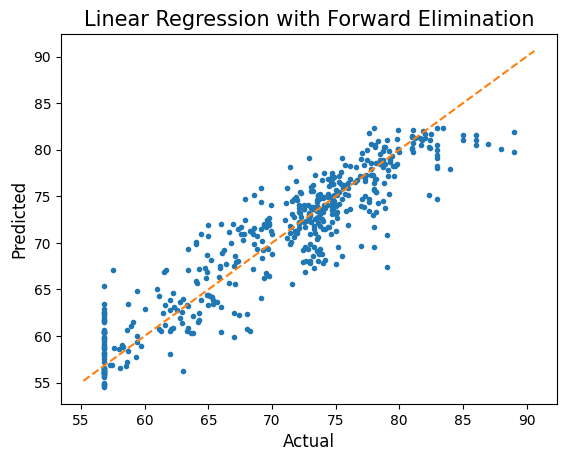

In [110]:
# Scatter plot of y_test_forward and  y_pred_forward_selected

plt.plot(y_test_forward, y_pred_forward_selected, '.')
plt.xlabel('Actual', fontsize=12)  # set x-axis label
plt.ylabel('Predicted', fontsize=12)  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.title('Linear Regression with Forward Elimination', fontsize=15)
plt.show()


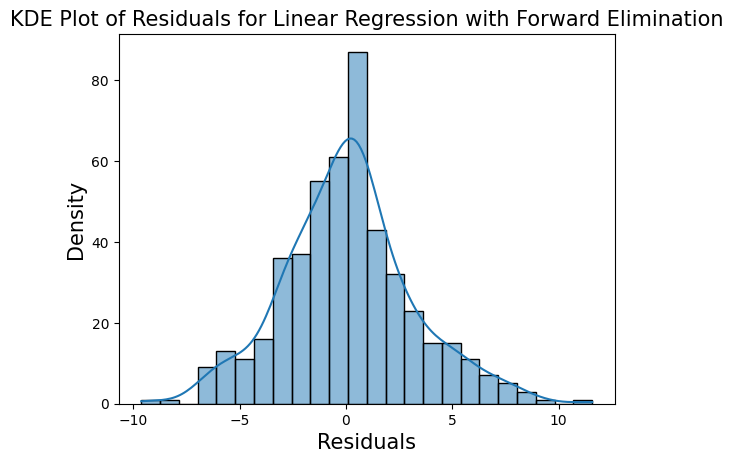

In [111]:
# Residual plot for y_test_forward, y_pred_forward_selected

sns.histplot(y_test_forward - y_pred_forward_selected, kde=True)
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('KDE Plot of Residuals for Linear Regression with Forward Elimination', fontsize=15)
plt.show()


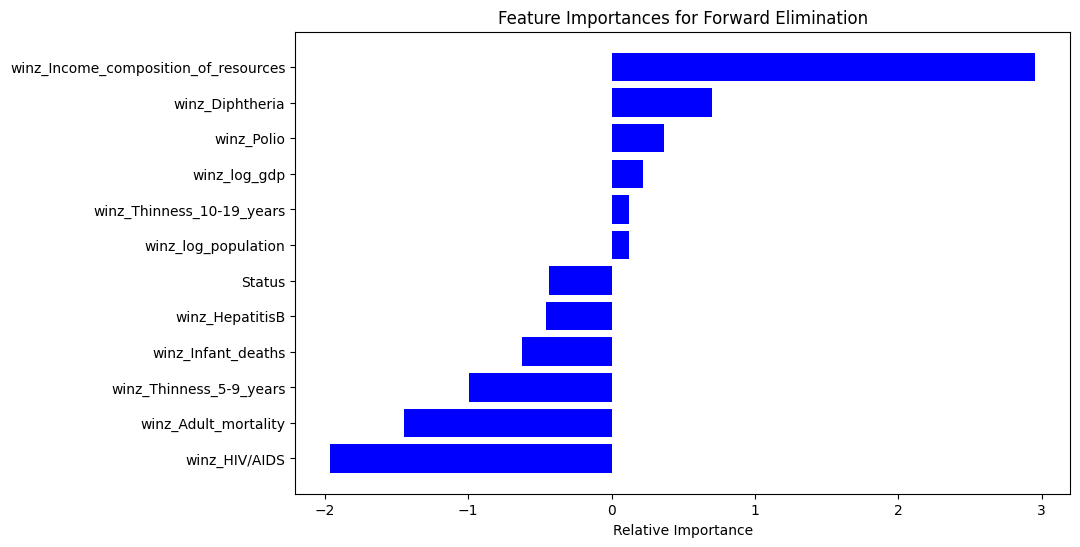

In [112]:
# prompt: Feature importances for forward selection model

importances = model_forward_selected.coef_
features = X_selected_forward
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Forward Elimination')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Exhaustive Search Model

In [113]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [114]:
# Fit a exhaustive feature selector model to the data


model_exhaustive = ExhaustiveFeatureSelector(LinearRegression(),
                                          min_features=1,
                                          max_features=18,
                                          scoring='r2',
                                          cv=5,
                                          n_jobs=-1)

model_exhaustive.fit(X, y)


Features: 262143/262143

ExhaustiveFeatureSelector(estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12], [13],
                                          [14], [15], [16], [17]],
                          max_features=18, n_jobs=-1, scoring='r2')

In [115]:
model_exhaustive.best_feature_names_


('Status',
 'winz_Adult_mortality',
 'winz_HepatitisB',
 'winz_Polio',
 'winz_Diphtheria',
 'winz_HIV/AIDS',
 'winz_Thinness_10-19_years',
 'winz_Thinness_5-9_years',
 'winz_Income_composition_of_resources',
 'winz_log_gdp',
 'winz_log_population',
 'winz_Infant_deaths')

In [116]:
model_exhaustive.best_score_

0.8230354405452189

In [117]:
model_exhaustive.best_idx_

(0, 1, 3, 4, 6, 7, 8, 9, 10, 12, 13, 15)

In [118]:

df_exhaustive = pd.DataFrame({
    'idx': model_exhaustive.best_idx_,
    'feature_name': model_exhaustive.best_feature_names_,

})

df_exhaustive


idx                          feature_name
0     0                                Status
1     1                  winz_Adult_mortality
2     3                       winz_HepatitisB
3     4                            winz_Polio
4     6                       winz_Diphtheria
5     7                         winz_HIV/AIDS
6     8             winz_Thinness_10-19_years
7     9               winz_Thinness_5-9_years
8    10  winz_Income_composition_of_resources
9    12                          winz_log_gdp
10   13                   winz_log_population
11   15                    winz_Infant_deaths

In [119]:
pd.DataFrame.from_dict(model_exhaustive.get_metric_dict()).T

feature_idx  \
0                                                    (0,)   
1                                                    (1,)   
2                                                    (2,)   
3                                                    (3,)   
4                                                    (4,)   
...                                                   ...   
262138  (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
262139  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
262140  (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
262141  (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
262142  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                cv_scores avg_score  \
0       [0.15663321688561027, 0.17390766005002212, 0.3...  0.248341   
1       [0.5157019207316249, 0.3964691563963366, 0.432...  0.430265   
2       [0.2020014763896989, 0.22087134738347847, 0.14...  0.152346   
3       [0.0706442876981127, 0.0003764162302449803, 0....   0.05774   
4       [0.2547157032472577, 0.3570953061754032, 0.266...  0.255179   
...                                                   ...       ...   
262138  [0.847293282563677, 0.8362224737210876, 0.7602...  0.818539   
262139  [0.8435952037147343, 0.8400136739659582, 0.762...  0.819581   
262140  [0.8184135581995575, 0.8367837668185151, 0.724...  0.797527   
262141  [0.8401357042964156, 0.8453634535293938, 0.764...  0.818903   
262142  [0.8441072036080126, 0.8407308272492953, 0.763...  0.819195   

                                            feature_names  ci_bound   std_dev  \
0                                               (Status,)  0.095403  0.074227   
1                                 (winz_Adult_mortality,)  0.077527  0.060319   
2                                         (winz_Alcohol,)  0.090863  0.070694   
3                                      (winz_HepatitisB,)   0.05422  0.042185   
4                                           (winz_Polio,)   0.07479  0.058189   
...                                                   ...       ...       ...   
262138  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.042759  0.033268   
262139  (Status, winz_Adult_mortality, winz_HepatitisB...  0.041899  0.032599   
262140  (Status, winz_Alcohol, winz_HepatitisB, winz_P...  0.052512  0.040856   
262141  (winz_Adult_mortality, winz_Alcohol, winz_Hepa...  0.040145  0.031234   
262142  (Status, winz_Adult_mortality, winz_Alcohol, w...  0.041857  0.032566   

         std_err  
0       0.037113  
1       0.030159  
2       0.035347  
3       0.021093  
4       0.029095  
...          ...  
262138  0.016634  
262139    0.0163  
262140  0.020428  
262141  0.015617  
262142  0.016283  

[262143 rows x 7 columns]

In [120]:
# Fit a linear regression model using the selected features from exhaustive search


X_exhaustive = df7_scaled.drop(columns=['winz_Life_expectancy'])
y_exhaustive = df7['winz_Life_expectancy']

X_train_exhaustive, X_test_exhaustive, y_train_exhaustive, y_test_exhaustive = train_test_split(X_exhaustive, y_exhaustive, test_size=0.2, random_state=42)

X_selected_exhaustive = df_exhaustive['feature_name'].tolist()
X_train_selected_exhaustive = X_train_exhaustive[X_selected_exhaustive]
X_test_selected_exhaustive = X_test_exhaustive[X_selected_exhaustive]

model_exhaustive_selected = LinearRegression()
model_exhaustive_selected.fit(X_train_selected_exhaustive, y_train_exhaustive)

y_pred_exhaustive_selected = model_exhaustive_selected.predict(X_test_selected_exhaustive)

r2_exhaustive_selected = r2_score(y_test_exhaustive, y_pred_exhaustive_selected)
print("R-squared Exhaustive Selection Selected Features:", r2_exhaustive_selected)

mse_exhaustive_selected = mean_squared_error(y_test_exhaustive, y_pred_exhaustive_selected)
print("Mean Squared Error:", mse_exhaustive_selected)

rmse_exhaustive_selected = np.sqrt(mean_squared_error(y_test_exhaustive, y_pred_exhaustive_selected))
print("Root Mean Squared Error:", rmse_exhaustive_selected)

mae_exhaustive_selected = mean_absolute_error(y_test_exhaustive, y_pred_exhaustive_selected)
print("Mean Absolute Error:", mae_exhaustive_selected)


R-squared Exhaustive Selection Selected Features: 0.8436043159019853
Mean Squared Error: 9.452124485397766
Root Mean Squared Error: 3.0744307579449184
Mean Absolute Error: 2.3176616500349483


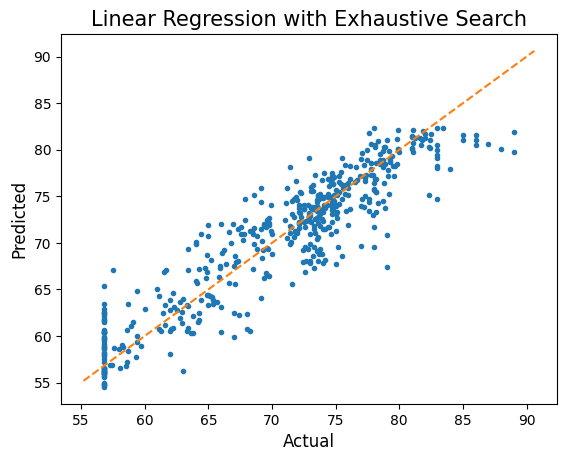

In [121]:
# Plot a scatter plot of y_test_exhaustive and y_pred_exhaustive_selected

plt.plot(y_test_exhaustive, y_pred_exhaustive_selected, '.')
plt.xlabel('Actual', fontsize=12)  # set x-axis label
plt.ylabel('Predicted', fontsize=12)  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.title('Linear Regression with Exhaustive Search', fontsize=15)
plt.show()




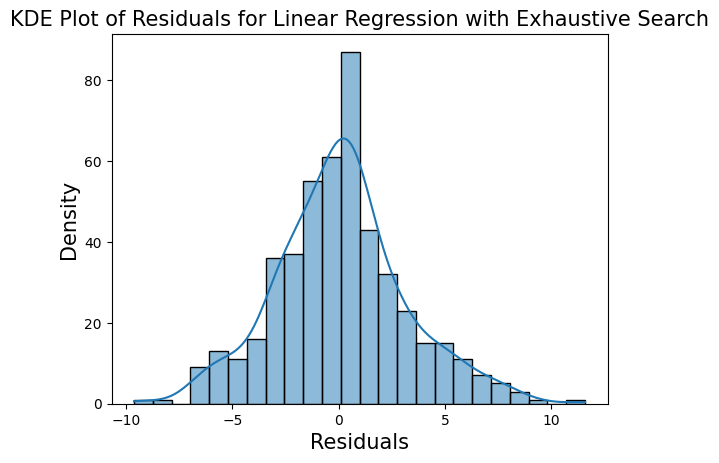

In [122]:
# Residual plot for y_test_exhaustive and y_pred_exhaustive_selected

sns.histplot(y_test_exhaustive - y_pred_exhaustive_selected, kde=True)
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('KDE Plot of Residuals for Linear Regression with Exhaustive Search', fontsize=15)
plt.show()



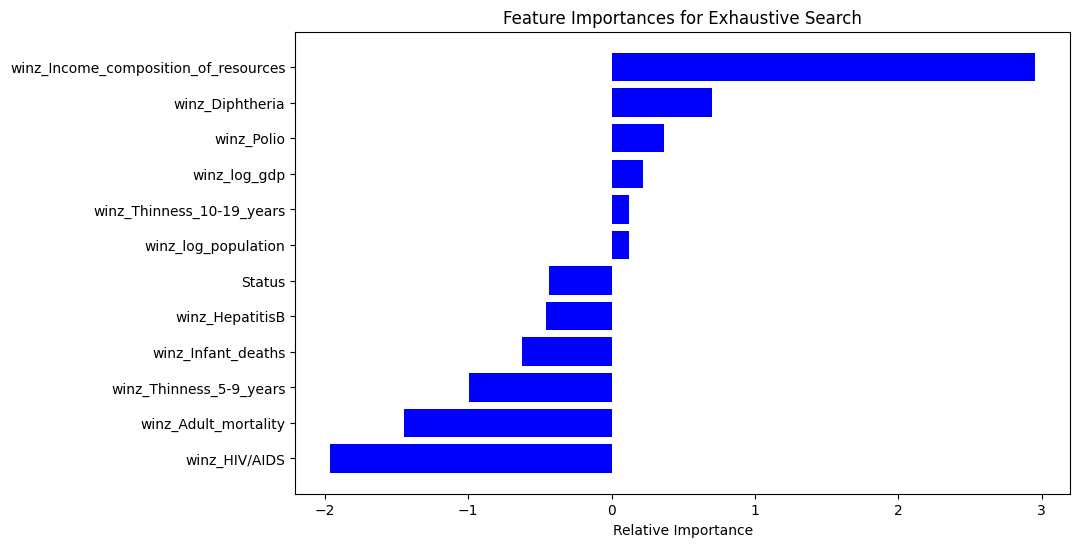

In [123]:

importances = model_exhaustive_selected.coef_
features = X_selected_exhaustive
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances for Exhaustive Search')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Comparison

In [124]:


# Create a dataframe with the R-squared values
df_r2 = pd.DataFrame({
    'Model': ['PCA+LR', 'Lasso', 'Ridge', 'Forward Elimination', 'Backward Elimination', 'Exhaustive search'],
    'R-squared': [r2_lr, r2_lasso, r2_ridge, r2_forward_selected, r2_backward_selected, r2_exhaustive_selected]
})

# Sort the dataframe by R-squared in descending order
df_r2 = df_r2.sort_values(by='R-squared', ascending=False)

# Set the index of the dataframe to the 'Model' column
df_r2.set_index('Model', inplace=True)

# Display the dataframe
df_r2.style.background_gradient(cmap='coolwarm')


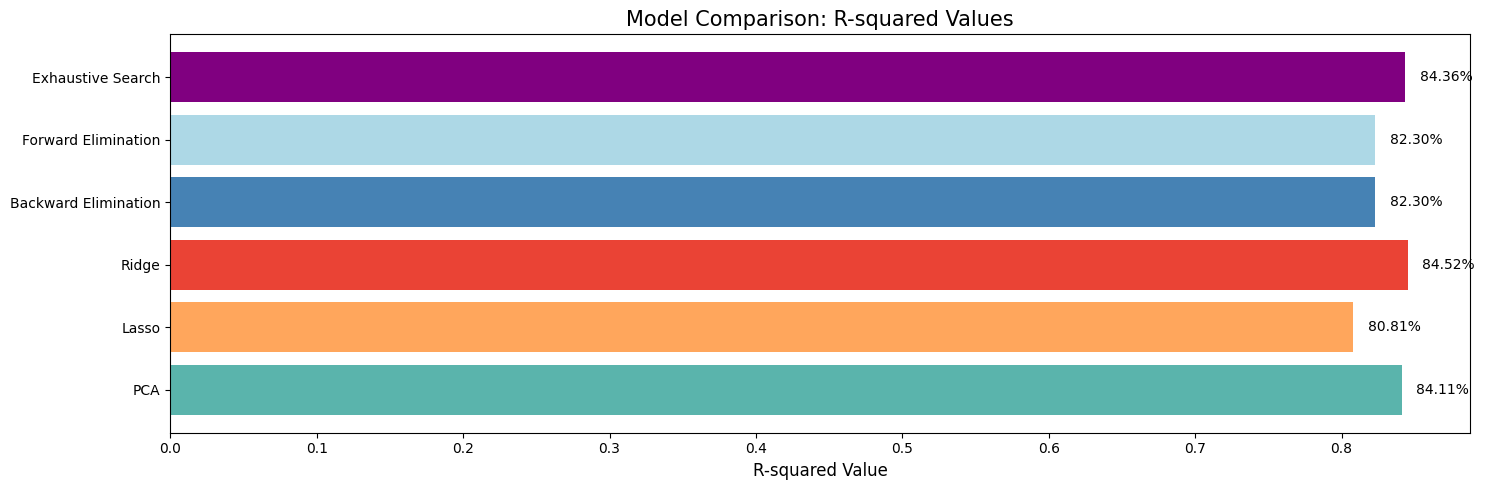

In [125]:


models = ['PCA', 'Lasso', 'Ridge', 'Backward Elimination', 'Forward Elimination', 'Exhaustive Search']
r2_values = [r2_lr, r2_lasso, r2_ridge, r2_backward, r2_forward, r2_exhaustive_selected]

fig, ax = plt.subplots(figsize=(15, 5))

ax.barh(models, r2_values, color=['#5AB4AC', '#ffa65c', '#ea4335','steelblue','lightblue','#800080'])

for i, value in enumerate(r2_values):
    value_str = f'{value:.2%}'
    ax.text(value + 0.01, i, value_str, ha='left', va='center', fontsize=10)

ax.set_xlabel('R-squared Value', fontsize=12)
ax.set_title('Model Comparison: R-squared Values', fontsize=15)

plt.tight_layout()
plt.show()


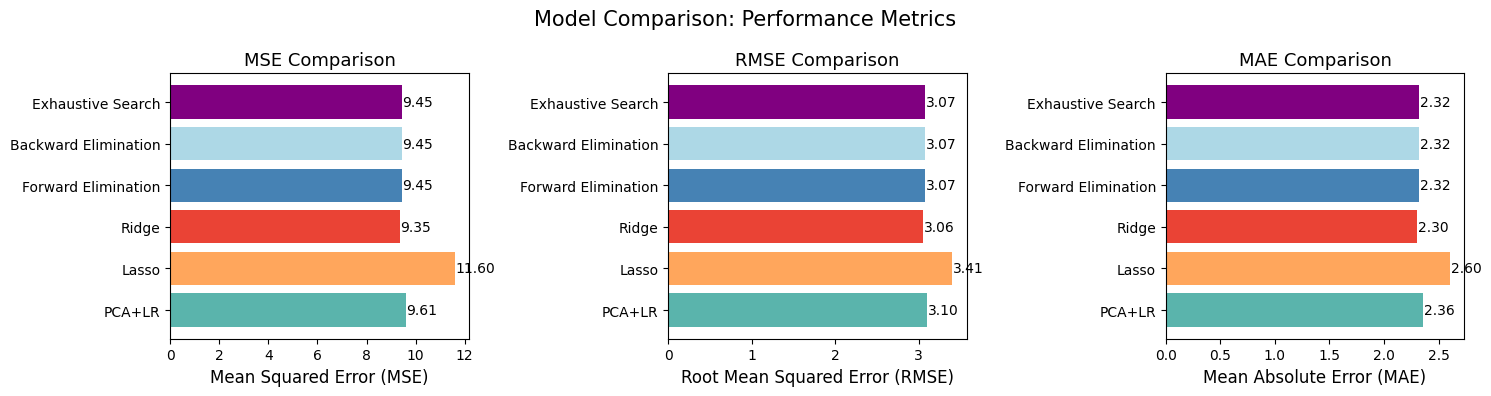

In [126]:
## Error metrics comparison

mse_exhaustive_selected = mean_squared_error(y_test_exhaustive, y_pred_exhaustive_selected)
rmse_exhaustive_selected = np.sqrt(mean_squared_error(y_test_exhaustive, y_pred_exhaustive_selected))
mae_exhaustive_selected = mean_absolute_error(y_test_exhaustive, y_pred_exhaustive_selected)

models = ['PCA+LR', 'Lasso', 'Ridge', 'Forward Elimination', 'Backward Elimination', 'Exhaustive Search']
mse_values = [mse_lr, mse_lasso, mse_ridge, mse_backward_selected,mse_forward_selected, mse_exhaustive_selected]
rmse_values = [rmse_lr, rmse_lasso, rmse_ridge, rmse_backward_selected,rmse_forward_selected, rmse_exhaustive_selected]
mae_values = [mae_lr, mae_lasso, mae_ridge, mae_backward_selected,mae_forward_selected, mae_exhaustive_selected]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Model Comparison: Performance Metrics', fontsize=15)

axs[0].barh(models, mse_values, color=['#5AB4AC', '#ffa65c', '#ea4335','steelblue','lightblue','#800080'])
axs[0].set_xlabel('Mean Squared Error (MSE)', fontsize=12)
axs[0].set_title('MSE Comparison', fontsize=13)

for i, value in enumerate(mse_values):
    value_str = f'{value:.2f}'
    axs[0].text(value + 0.01, i, value_str, ha='left', va='center', fontsize=10)

axs[1].barh(models, rmse_values, color=['#5AB4AC', '#ffa65c', '#ea4335','steelblue','lightblue','#800080'])
axs[1].set_xlabel('Root Mean Squared Error (RMSE)', fontsize=12)
axs[1].set_title('RMSE Comparison', fontsize=13)

for i, value in enumerate(rmse_values):
    value_str = f'{value:.2f}'
    axs[1].text(value + 0.01, i, value_str, ha='left', va='center', fontsize=10)

axs[2].barh(models, mae_values, color=['#5AB4AC', '#ffa65c', '#ea4335','steelblue','lightblue','#800080'])
axs[2].set_xlabel('Mean Absolute Error (MAE)', fontsize=12)
axs[2].set_title('MAE Comparison', fontsize=13)

for i, value in enumerate(mae_values):
    value_str = f'{value:.2f}'
    axs[2].text(value + 0.01, i, value_str, ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


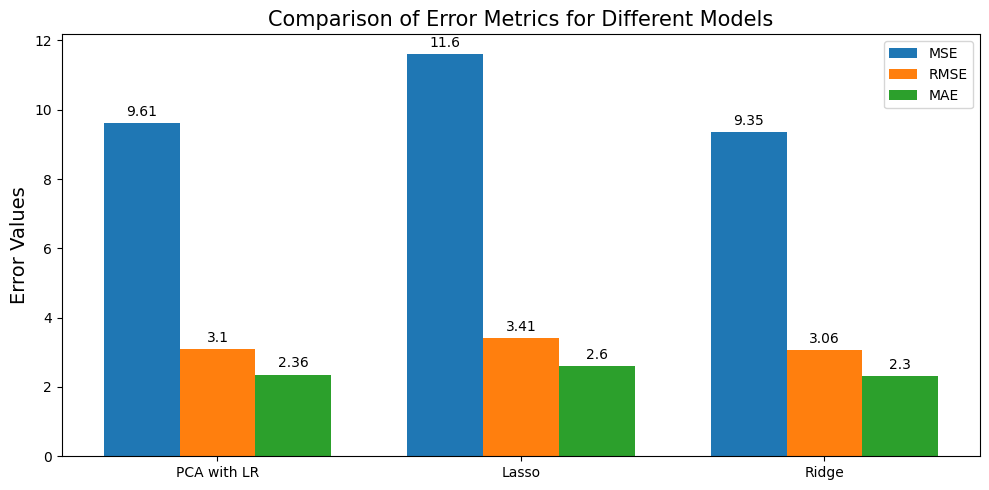

In [127]:
# compare the MSE, MSE and RMSE for all the three models and annotate the bars with values in a single plot

models = ['PCA with LR', 'Lasso', 'Ridge']
mse = [mse_lr, mse_lasso, mse_ridge]
rmse = [rmse_lr, rmse_lasso, rmse_ridge]
mae = [mae_lr, mae_lasso, mae_ridge]

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - width, mse, width, label='MSE')
rects2 = ax.bar(x, rmse, width, label='RMSE')
rects3 = ax.bar(x + width, mae, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error Values', fontsize=14)
ax.set_title('Comparison of Error Metrics for Different Models', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add values above bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects3:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

fig.tight_layout()

plt.show()


## Champion Model : Ridge Regression

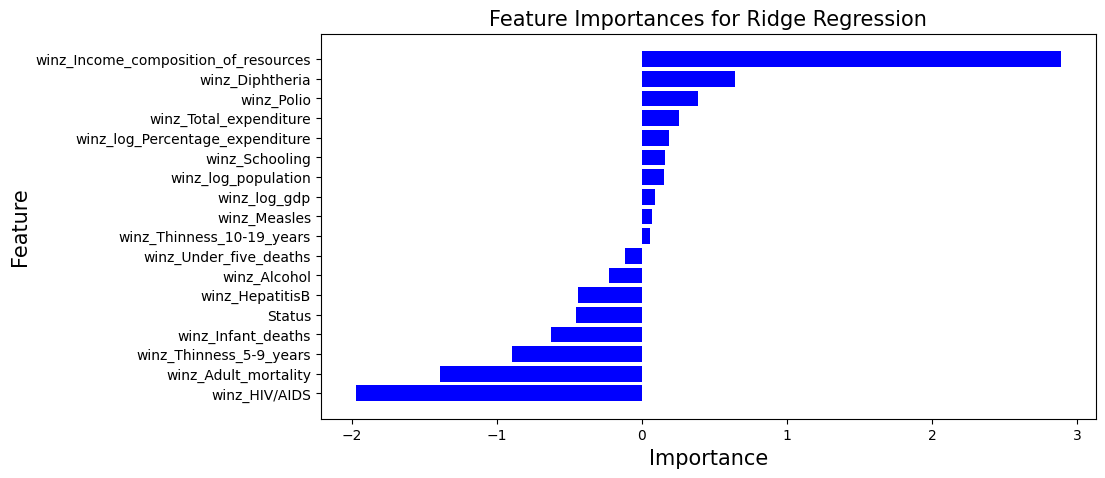

In [128]:
# Plot the feature importances for ridge regression

importances = model_ridge.coef_

features = X_train_ridge.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 5))
plt.title('Feature Importances for Ridge Regression', fontsize=15)
plt.barh(range(len(features)), importances[indices], color='b', align='center')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.show()


## Recommendations

### According to the Ridge regression model, the funding will be based majorly upon the following factors with negative values as they negatively affect the life expectancy:


1.   HIV AIDS
2.    Adult Mortality
3.   Thinness of Children aged 5-9 years
4.   Infant Deaths
5.   Status of the country -- Developed vs Developing
6.   Hepatitis B
7.   Alcoholism
8.   Under 5 deaths



In [129]:
# Test the ridge regression model on sample unscaled data

# Sample unseen data
sample_data = {
    'Adult_Mortality': 100,
    'infant_deaths': 50,
    'Alcohol': 5,
    'percentage_expenditure': 10,
    'Hepatitis_B': 20,
    'Measles': 10,
    'under_five_deaths': 75,
    'Polio': 90,
    'Total_expenditure': 1000,
    'Diphtheria': 80,
    'HIV_AIDS': 5,
    'GDP': 10000,
    'Population': 1000000,
    'thinness_5_9_years': 10,
    'thinness_10_19_years': 5,
    'Income_composition_of_resources': 0.5,
    'Schooling': 10,
    'Status': 'Developing'
}

# Convert sample data to a DataFrame
sample_df = pd.DataFrame(data=[sample_data])

# Encode the categorical variable
sample_df['Status'] = label_encoder.transform(sample_df['Status'])

scaler = StandardScaler()

# Scale the sample data
sample_scaled = scaler.fit_transform(sample_df)

# Train the model
model_ridge.fit(X_train_ridge, y_train_ridge)

# Predict life expectancy
predicted_life_expectancy = model_ridge.predict(sample_scaled)[0]

# Print the predicted life expectancy
print(f"Predicted Life Expectancy: {predicted_life_expectancy}")

Predicted Life Expectancy: 70.99750325051049
